In [96]:
%matplotlib inline

# Identificação e diferença salarial entre pessoas negras e brancas

## Introduction

**Cotexto.** Entre 1500 a 1822, a escravidão se sustentou a base do sistema econômico e social da época. Tendo como mão de obra escrava composta por indígenas e negros, explorados e submetidos a condições desumanas de vida por ordem dos colonizadores. Em 1888, se deu a "abolição da escravidão" no Brasil. Porém, como se sabe, em nenhum momento houve a garantia de direitos fundamentais para sobrevivência dos mesmos. No século XX, por meio de movimentos sociais, se criou uma mobilização coletiva a fim de buscar pela igualdade. Somente em 1988 na Constituição Federal que se estabeleceu direitos fundamentais a todos, sem discriminações. 
Os dados nos mostram que mesmo após séculos de lutas o racismo se faz cada vez mais presente no sistema capitalista. Segundo o IBGE a população negra (pretos e pardos) compõem 54,9% da população brasileira. A renda média mensal de pessoas pretas equivalia a 55,8% da dos brancos em 2019, atingindo um novo pico de desigualdade salarial.

**Problema de Negócio.** Focando na desigualdade racial no mercado de trabalho, fica evidente que  mesmo que a população negra seja maioria, em qualquer posição recebe um menor salário, e quando ocupa espaços de gerência corporativa é em menor quantidade e se vê diante do pensamento racista estabelecido de forma homogêneo através da ideologia de superioridade de uma raça sob a outra. “Podemos dizer que o racismo é uma forma sistemática de discriminação que tem a raça como fundamento, e que se manifesta por meio de práticas conscientes ou inconscientes que culminam em desvantagens ou privilégios para indivíduos, a depender do grupo racial ao qual pertençam.” (ALMEIDA, 2022, p. 32)
Isso faz com que pessoas brancas, que ocupam o mesmo cargo que pessoas pretas recebam salários superiores. No mundo corporativo isso se constitui como racismo institucional. No funcionamento da instituição, mesmo que indiretamente, resulta em desvantagens e privilégios com base na raça. Ou seja, ainda que haja programas de inclusão e diversidade, não serão aplicadas a fundo e para além disso descumpre a legislação brasileira sobre igualdade salarial, do artigo 461: “Sendo idêntica a função, a todo trabalho de igual valor, prestado ao mesmo empregador, no mesmo estabelecimento empresarial, corresponderá igual salário, sem distinção de sexo, etnia, nacionalidade ou idade”.
Busca-se identificar este problema através de dados internos das empresas, os analisando e comparando, a fim de apontar possíveis falhas e constituir uma nova dinâmica institucional igualitária

**Impacto.** Obtendo tais dados será possível identificar de forma mais precisa a desigualdade salarial, isso consequentemente proporcionará a possibilidade de reavaliação dos processos internos. 
Construindo a cada fase do processo, a projeção de maior igualdade salarial na empresa; possíveis implantações de projetos para diminuição de vieses, possibilitação de maior diversidade nos cargos e por consequência maiores rendimentos. Buscamos contribuir com o coletivo, visando estabelecer maior igualdade racial.

**Desenho da solução.** Por meio de um banco de dados de funcionários contendo a relação de raça, cargo e salário, busca-se encontrar divergências salariais. O modelo será capaz de informar em qual momento houve a divergência salarial.

## Base de dados

O Ministério do Trabalho e Emprego permite que o usuário acesse os microdados sobre o trabalho formal e, para isso, utiliza-se da Relação Anual de Informações Sociais (RAIS) e do Cadastro Geral de Empregados e Desempregados (CAGED). 

O CAGED é um banco de dados composto por relatórios mensais enviados pelas empresas, informando o Governo Federal a respeito das admissões e demissões realizadas. Já a base de dados da RAIS é originária dos registros administrativos do Ministério do Trabalho utilizados para acompanhar a arrecadação de contribuições e a distribuição de benefícios previstas na legislação trabalhista. Instituída em 1975, a RAIS representa, praticamente, um censo anual do mercado formal brasileiro, na medida em que todas as organizações legais (privadas e públicas) são obrigadas a declará-la. O tratamento aplicado aos dados dos estabelecimentos e aos vínculos empregatícios permite sua desagregação no âmbito do município, de subatividades econômicas e de ocupações. Tais informações são disponibilizadas segundo o estoque (número de empregos) e a movimentação de mão-de-obra empregada (admissões e desligamentos), por gênero, faixa etária, grau de instrução, rendimento médio, raça e faixas de rendimentos em salários mínimos, sendo possível, também, construir dados sobre a massa salarial.

Para este trabalho foi utilizado os dados da base do RAIS de 2020, particularmente do Estado de São Paulo. O dataset contém os dados de aproximadamente 18M registros de trabalhadores com 60 informações distintas sobre o trabalhador. diferentes informações

18,888,463 rows & 60 columns. Size: ~9GB. Source: RAIS.

## Import

In [2]:
# Carregando alguns módulos essenciais para trabalharmos os dados
# Removendo warnings chatos
import warnings
warnings.filterwarnings('ignore')
# Carregando as principais bibliotecas com o 'import'
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from typing import List, Tuple

# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# Modelling libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 

# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
#from category_encoders.target_encoder import TargetEncoder

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")

# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
#pd.options.display.max_rows = 999
#pd.options.display.max_columns = 999 

## Dados

Para ter uma noção dos dados disponíveis, vamos visualizá-los. Abaixo as 5 primeiras linhas do dataset, como todas as colunas existentes.

In [3]:
df = pd.read_csv("RAIS_VINC_PUB_SP.txt", sep=';', decimal=',', encoding='cp1252')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro SC,Vl Rem Fevereiro SC,Vl Rem Março SC,Vl Rem Abril SC,Vl Rem Maio SC,Vl Rem Junho SC,Vl Rem Julho SC,Vl Rem Agosto SC,Vl Rem Setembro SC,Vl Rem Outubro SC,Vl Rem Novembro SC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
0,9999,{ñ class},{ñ class},99,99,99,21,514320,81214,74705,9999,0,4,6,0,2,3,1,44,27,0,1,0,08,0,351300,10,2305,0,0,8,0,0.0,0.0,1141.23,1.08,8121400,1,6,8.4,0,1,CNPJ,0,10,21,1201.30,1121.22,1121.22,1201.30,1201.30,1201.30,1201.30,0.0,0.0,0.00,0.0,0,0,0
1,9999,{ñ class},{ñ class},99,99,99,11,715210,41204,45217,9999,0,7,6,0,4,5,1,44,56,0,1,0,09,0,354850,10,2305,0,0,2,0,0.0,0.0,2252.42,2.15,4120400,1,2,26.1,0,1,CNPJ,0,10,15,2056.56,2056.56,2056.56,2056.56,2056.56,2742.08,2742.08,0.0,0.0,0.00,0.0,0,0,0
2,9999,{ñ class},{ñ class},99,99,99,11,513205,56112,55212,9999,0,4,6,0,2,2,1,44,27,0,1,0,01,0,354990,10,2062,0,0,9,0,0.0,0.0,1109.85,1.06,5611201,1,4,4.5,0,1,CNPJ,0,10,21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0,0,0
3,1471,{ñ class},{ñ class},99,99,99,21,717020,43134,45136,0030,0,6,6,0,2,2,1,44,44,0,0,3,07,0,355030,10,2305,0,0,8,0,0.0,0.0,1317.67,1.25,4313400,1,4,3.9,2,1,CNPJ,0,10,15,0.00,0.00,1548.21,1480.26,1601.60,640.64,0.00,0.0,0.0,0.00,0.0,0,0,0
4,9999,{ñ class},{ñ class},99,99,99,11,715210,38114,90000,9999,0,6,6,0,3,7,1,44,42,0,0,0,11,354340,354340,10,2054,0,0,2,0,0.0,0.0,1996.51,1.90,3811400,1,10,69.0,0,1,CNPJ,0,10,14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3475.5,517.52,0.0,0,0,0


In [5]:
#Tamanho do dataset
rows = df.shape[0]
columns = df.shape[1]
print("Number of rows = {}, number of columns = {}.".format(rows, columns))

Number of rows = 18888463, number of columns = 60.


Cada linha do dataset representa um trabalhador diferente, mas por questões de privacidade não existe um Id específico para o trabalhador e nem para o empregador. A lista com as colunas disponíveis e o tipo de dados é:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18888463 entries, 0 to 18888462
Data columns (total 60 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Bairros SP               object 
 1   Bairros Fortaleza        object 
 2   Bairros RJ               object 
 3   Causa Afastamento 1      int64  
 4   Causa Afastamento 2      int64  
 5   Causa Afastamento 3      int64  
 6   Motivo Desligamento      int64  
 7   CBO Ocupação 2002        object 
 8   CNAE 2.0 Classe          int64  
 9   CNAE 95 Classe           int64  
 10  Distritos SP             object 
 11  Vínculo Ativo 31/12      int64  
 12  Faixa Etária             int64  
 13  Faixa Hora Contrat       int64  
 14  Faixa Remun Dezem (SM)   int64  
 15  Faixa Remun Média (SM)   int64  
 16  Faixa Tempo Emprego      int64  
 17  Escolaridade após 2005   int64  
 18  Qtd Hora Contr           int64  
 19  Idade                    int64  
 20  Ind CEI Vinculado        int64  
 21  Ind Si

Explicando as `features`que temos disponíveis:

0. **Bairros SP**: Bairros do Município de São Paulo. Data type: `string`
1. **Bairros Fortaleza**:  Bairros do Município de Fortaleza. Data type: `string`
2. **Bairros RJ**: Bairros do Município do Rio de Janeiro. Data type: `string`
3. **Causa Afastamento 1**: Causa do primeiro afastamento do empregado/servidor no ano-base - a partir de 2002 (12 opções distintas). Data type: `int64`
4. **Causa Afastamento 2**: Causa do segundo afastamento do empregado/servidor no ano-base - a partir de 2002 (12 opções distintas). Data type: `int64`
5. **Causa Afastamento 3**: Causa do terceiro afastamento do empregado/servidor no ano-base - a partir de 2002 (12 opções distintas). Data type: `int64`
6. **Motivo Desligamento**: Causa do desligamento  (30 opções distintas) . Data type: `int64`
7. **CBO Ocupação 2002**: Classificação Brasileira de Ocupações, criada em 2002 - atualizada em 23/08/2004 (mais de 5000 categorias). Data type: `string`
8. **CNAE 2.0 Classe**: Classe de Atividade Econômica, segundo classificação CNAE - versão 2.0. A CNAE é uma classificação hierarquizada em cinco níveis – seções, divisões, grupos, classes e subclasses. Data type: `int64`
9. **CNAE 95 Classe**: Classe de Atividade Econômica segundo a classificação CNAE/95 (CNAE 1.0, revisada em 2002) (614 categorias). Data type: `int64`
10. **Distritos SP**: Cidade de São Paulo foi dividida em 96 distritos distintos.  Data type: `string`
11. **Vínculo Ativo 31/12**: Indicador de vínculo ativo em 31/12.  Data type: `int64`
12. **Faixa Etária**: Faixa Etaria do trabalhador. Subdivisão das idades em 8 faixas distintas. Data type: `int64`
13. **Faixa Hora Contrat**: Faixa de horas contratuais. 6 faixas diferentes de 0 a 44 horas semanais. Data type: `int64`
14. **Faixa Remun Dezem (SM)**: Faixa de remuneração media de dezembro do trabalhador em salarios mínimos. Data type: `int64`
15. **Faixa Remun Média (SM)**: Faixa de remuneração media do ano do trabalhador em salarios mínimos. Data type: `int64`
16. **Faixa Tempo Emprego**: Faixa de tempo de emprego. Tempo (em meses) dividido em 8 faixas diferentes . Data type: `int64`
17. **Escolaridade após 2005**: Grau de instrução - a partir da RAIS2008. 11 categorias diferentes. Data type: `int64`
18. **Qtd Hora Contr**: Quantidade de horas contratuais por semana. Data type: `int64`
19. **Idade**: Idade do trabalhador  (quando acumulada representa a soma das idades). Data type: `int64`
20. **Ind CEI Vinculado**: Indicador de CEI vinculado. Data type: `int64`
21. **Ind Simples**: Indicador de optante pelo SIMPLES - a partir de 2001. Data type: `int64`
22. **Mês Admissão**: mês da admissao do trabalhador naquele ano (se for o caso). Data type: `int64`
23. **Mês Desligamento**: mês de desligamento do trabalhador naquele ano (se for o caso). Data type: `string`
24. **Mun Trab**: Município onde o empregado esteja trabalhando ou prestando serviço - a partir de 2002. Data type: `int64`
25. **Município**: Município de localização do estabelecimento. Data type: `int64`
26. **Nacionalidade**: Nacionalidade do trabalhador. Data type: `int64`
27. **Natureza Jurídica**: Natureza Jurídica (CONCLA/2002) - a partir da RAIS2008 (76 categorias diferentes). Data type: `int64`
28. **Ind Portador Defic**: Indicador se o empregado/servidor é portador de deficiência habilitado ou beneficiário reabilitado. Data type: `int64`
29. **Qtd Dias Afastamento**: Quantidade total de dias de afastamento do empregado/servidor no ano-base - a partir de 2002. Data type: `int64`
30. **Raça Cor**: Raça e Cor do Trabalhador. Data type: `int64` **É a variável importante!**
31. **Regiões Adm DF**:  Regiões Administrativas do Distrito Federal. Data type: `int64`
32. **Vl Remun Dezembro Nom**: Remuneração do trabalhador em dezembro (valor nominal) - a partir de 1999. Data type: `float`
33. **Vl Remun Dezembro (SM)**: Remuneração de dezembro em salários mínimos (quando acumulada representa massa salarial). Data type: `float`
34. **Vl Remun Média Nom**: Remuneração média do trabalhador (valor nominal) - a partir de 1999. Data type: `float`  **É a nossa variável de interesse!**
35. **Vl Remun Média (SM)**: Remuneração média do ano em salários mínimos (quando acumulada representa massa salarial). Data type: `float` **É a nossa variável de interesse!**
36. **CNAE 2.0 Subclasse**: Subclasse de Atividade Econômica, segundo classificação CNAE - versão 2.0. Data type: `int64`
37. **Sexo Trabalhador**: Sexo do trabalhador (Masculino ou Feminino). Data type: `int64`
38. **Tamanho Estabelecimento**: Tamanho do estabelecimento - número de empregados ativos em 31/12 (10 categorias). Data type: `int64`
39. **Tempo Emprego**: Tempo de emprego do trabalhador (quando acumulada representa a soma dos meses). Data type: `float`
40. **Tipo Admissão**: Tipo de admissão. Data type: `int64`
41. **Tipo Estab**: Tipo de estabelecimento categorizado em 1 para CNPJ ou  3 para CEI. Data type: `int64`
42. **Tipo Estab.1**: Tipo de estabelecimento categorizado em CNPJ ou CEI. Data type: `string`
43. **Tipo Defic**: Tipo de deficiência/Beneficiário habilitado (7 categorias). Data type: `int64`
44. **Tipo Vínculo**: Tipo de vínculo empregatício (19 categorias). Data type: `int64`
45. **IBGE Subsetor**: Subsetor IBGE 80 do estabelecimento - a partir de 2015 (25 categorias). Data type: `int64`
46. **Vl Rem Janeiro SC**: Remuneração do trabalhador em janeiro (valor nominal) - a partir de 2015. Data type: `float`
47. **Vl Rem Fevereiro SC**: Remuneração do trabalhador em fevereiro (valor nominal) - a partir de 2015. Data type: `float`
48. **Vl Rem Março SC**: Remuneração do trabalhador em março (valor nominal) - a partir de 2015. Data type: `float`
49. **Vl Rem Abril SC**: Remuneração do trabalhador em abril (valor nominal) - a partir de 2015. Data type: `float`
50. **Vl Rem Maio SC**: Remuneração do trabalhador em maio (valor nominal) - a partir de 2015. Data type: `float`
51. **Vl Rem Junho SC**: Remuneração do trabalhador em junho (valor nominal) - a partir de 2015. Data type: `float`
52. **Vl Rem Julho SC**: Remuneração do trabalhador em julho (valor nominal) - a partir de 2015. Data type: `float`
53. **Vl Rem Agosto SC**: Remuneração do trabalhador em agosto (valor nominal) - a partir de 2015. Data type: `float`
54. **Vl Rem Setembro SC**: Remuneração do trabalhador em setembro (valor nominal) - a partir de 2015. Data type: `float`
55. **Vl Rem Outubro SC**: Remuneração do trabalhador em outubro (valor nominal) - a partir de 2015. Data type: `float`
56. **Vl Rem Novembro SC**: Remuneração do trabalhador em novembro (valor nominal) - a partir de 2015. Data type: `float`
47. **Ano Chegada Brasil**: Ano da chegada ao Brasil do trabalhador estrangeiro. Data type: `int64`
48. **Ind Trab Intermitente**: Indicador de movimentação referente a contrato intermitente (a partir de 2017). Data type: `int64`
49. **Ind Trab Parcial**: Indicador de movimentação referente a contrato parcial (a partir de 2017). Data type: `int64`

## Limpando e modificando os dados

De forma a garantir que o dataset contenha apenas informações relevantes, uma limpeza e modificações em algumas `features` são necessárias. Com esta finalidade, algumas etapas foram seguindas, como mostradas abaixo:

### Removendo dados desnecessários.

Como estamos trabalhando com os dados do Estado de São Paulo, existem algumas colunas que não são relevantes, como as colunas `Bairros Fortaleza`, `Bairros RJ` e `Regiões Adm DF`. A variável `Tipo Estab.1` é igual à `Tipo Estab.`, porém expressa em `string`, por isso vou removê-la.

Para o projeto a variável de interesse é a remuneração do trabalhador. No dataset existem diferentes colunas que tem por objetivo informar este valor mensal e também por faixas de salário mínimo. Para termos apenas uma variável para análise, decidiu-se usar a remuneração média nominal, e remover todas as outras colunas, de forma a reduzir consideravelmente o tamanho do dataset.

In [11]:
list_drop = ['Bairros Fortaleza', 'Bairros RJ', 'Regiões Adm DF', 'Vl Remun Dezembro Nom', 'Faixa Remun Dezem (SM)', 'Faixa Remun Média (SM)', 'Vl Remun Dezembro Nom', 'Vl Remun Dezembro (SM)', 'Vl Remun Média (SM)', 'Vl Rem Janeiro SC', 'Vl Rem Fevereiro SC', 'Vl Rem Março SC', 'Vl Rem Abril SC', 'Vl Rem Maio SC', 'Vl Rem Junho SC', 'Vl Rem Julho SC', 'Vl Rem Agosto SC', 'Vl Rem Setembro SC', 'Vl Rem Outubro SC', 'Vl Rem Novembro SC', 'Tipo Estab.1']

In [20]:
df_v0 = df.drop(columns=list_drop)

### Consistência dos tipos de dados

No dataset, algumas colunas não estão formatadas corretamente. Então será feita algumas mudanças.

Na coluna `CBO Ocupação 2002` existe inconsistência com o tipo de dado. São valores categorizados, mas que estão inseridos no dataset como `string` e como `int`. Inicialmente, a coluna será transformada em `string`, por se tratar de uma categorização de dados.

In [21]:
#Existem dois tipos de dados na coluna CBO, transformando tudo em string
df_v0['CBO Ocupação 2002'] = df_v0['CBO Ocupação 2002'].astype(str)

Existem alguns valores nulos em algumas colunas, mas que estão com `ñ class`. Vou retirar estes valores e substituir por ´`NaN`

In [22]:
df_obj = df_v0.select_dtypes(['object'])
df_v0[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [23]:
#Substituir os dados sem classe por NaN
df_v0.replace('{ñ class}', np.nan, inplace = True)
df_v0.replace('{ñ', np.nan, inplace = True)

### Contando valores nulos

**Lidando adequadamente com valores nulos.** Analisando linhas com valores nulos, de forma a decidir se essas linhas serão ou não deletados

In [14]:
df_v0.isnull().sum()

Bairros SP                  1501516
Causa Afastamento 1               0
Causa Afastamento 2               0
Causa Afastamento 3               0
Motivo Desligamento               0
CBO Ocupação 2002                 0
CNAE 2.0 Classe                   0
CNAE 95 Classe                    0
Distritos SP                 386111
Vínculo Ativo 31/12               0
Faixa Etária                      0
Faixa Hora Contrat                0
Faixa Tempo Emprego               0
Escolaridade após 2005            0
Qtd Hora Contr                    0
Idade                             0
Ind CEI Vinculado                 0
Ind Simples                       0
Mês Admissão                      0
Mês Desligamento           13286439
Mun Trab                          0
Município                         0
Nacionalidade                     0
Natureza Jurídica                 0
Ind Portador Defic                0
Qtd Dias Afastamento              0
Raça Cor                          0
Vl Remun Média Nom          

Aparentemente, parece ter valores nulos em mês de desligamento, o que parece razoável uma vez que isso que dizer que naquele ano o trabalhador não foi desligado. Além disso existem valores nulos em Bairros e Distritos de SP, o que também faz sentido, pois os dados são referentes ao estado de São Paulo. 

Como a variável de interesse é salário, será identificado se existe valores zerados nesta coluna.

In [24]:
#Contando quantos 
df_v0['Vl Remun Média Nom'].value_counts()[0]

1000161

Para este projeto não interessa trabalhadores sem salário, pois como são dados informados pelos empregadores, pode existir alguma inconsistência. Por este motivo, as linhas com esses valores zerados serão removidos.

In [25]:
## Retirando valores zerado na aba salario
df_v0 = df_v0[df_v0['Vl Remun Média Nom'] != 0]

Algumas colunas que, aparentemente, não possuem dados nulos, podem possui dados ignorados ou incompletos a partir de outro código de preenchimento disponibilizado pelo Ministério do Trabalho. Verificando valores únicos para cada coluna, temos:

In [18]:
for col in df_v0:
    print(df_v0[col].unique())

['9999' '1471' '1117' ... '0239' '1199' '0833']
[99 40 30 85 50 90 70 10 60 20 80]
[99 40 85 50 70 10 90 30 80 20 60]
[99 40 85 70 90 10 50 30 80 60 20]
[21 11 12 10 31 60 90 30 64 20 70 72  0 76 62 75 74 22 79 33 73 63 34 32
 50 40 78 71 80]
['514320' '715210' '513205' ... '234656' '213160' '223252']
[81214 41204 56112 43134 38114 47822 46796 11216 81222 47211 28232 96092
 42138 78302 43304 55906 80111  1130 77331 86216 23427 78205 28330 42227
 17214 71120 49302 42111 77110 82113 47831 49299 47814 43991 25217 46338
 49248 22293 46711 81117 10139 47113  2101 88006 15211 85139 18130 43916
 53202 42120 82911 10325  1610 17338 64999 47423 32507 46231 46877 49213
 29492 74901 96025 47890 94995 52231 19314 42995 33210 82997 47237 69206
 33147 41107 85996 47717  1211 43126 82199 28291 47440 10911 47610 47547
  1334 17311 52508 13405 30121 46371 52117 85317 81125 10945 68102 56201
 43215 45200 25128 43223 10112 84116 20622 45307 81303 47229 24512 94308
  1512 31012 96033 15408 15106 10961 931

[0 1]
[ 4  7  6  5  8  3  2 99  1]
[ 6  5  4  3  1  2 99]
[ 3  5  2  7  1  6  8  4 99]
[ 1  2  3  4  5  6  7  8  9 10 11]
[44 36 22 43 24 40 26 16 12 13 42  1 30 11 33  0 38 20 18 41 39 37 21 29
 10 25 28 32 17 34 14  7 35  4  9  8 31 27 23 15  6  5  3 19  2]
[ 27  56  44  42  25  60  35  49  66  43  40  59  51  38  26  52  62  50
  45  34  46  41  37  32  39  58  57  47  28  53  24  21  22  33  30  20
  36  29  54  19  55  68  65  31  74  61  77  23  71  67  48  63  70  79
  64  72  88  75  69  18  16  80  17  73  85  76  95  78  81  87  83  91
  82  84  90  86  92  15  89   0  97  14  94  93  98  10 100  96  99]
[0 1]
[1 0]
[ 0  3  9  8  6 10  2  1  4  7  5 11 12]
['08' '09' '01' '07' '11' '04' '12' '02' '06' '10' '03' '05' nan]
[     0 354340 355030 ... 310950 210375 330411]
[351300 354850 354990 355030 354340 353800 350600 353780 352330 352590
 352680 350700 355170 350950 353950 351880 355620 354870 352640 350570
 350400 354390 352310 355190 351518 355100 351130 353440 351500 35076

[0 1]
[0 1]


Para cada coluna do dataset temos os seguintes valores que representam estas informações ignoradas e que não temos a informação:

* 1 Bairros SP                       '9999'
* 2 Causa Afastamento 1               99
* 3 Causa Afastamento 2               99
* 4 Causa Afastamento 3               99
* 5 Motivo Desligamento               0
* 6 CBO Ocupação 2002                 n class
* 7 CNAE 2.0 Classe                   n class
* 8 CNAE 95 Classe                    n class
* 9 Distritos SP                     '9999' nan
* 10 Vínculo Ativo 31/12               -
* 11 Faixa Etária                      99
* 12 Faixa Hora Contrat                99
* 13 Faixa Tempo Emprego               99
* 14 Escolaridade após 2005            -
* 15 Qtd Hora Contr                    0
* 16 Idade                             0
* 17 Ind CEI Vinculado                 -
* 18 Ind Simples                       -
* 19 Mês Admissão                      0 (nao admitido naquele ano)
* 20 Mês Desligamento           		nan
* 21 Mun Trab                          0
* 22 Município                         -
* 23 Nacionalidade                     80(outros)
* 24 Natureza Jurídica                 5037 (outras)
* 25 Ind Portador Defic                -
* 26 Qtd Dias Afastamento              -
* 27 Raça Cor                          99 (ignorado) ou 9 (não identificado)
* 28 Vl Remun Média Nom                0
* 29 CNAE 2.0 Subclasse                -
* 30 Sexo Trabalhador                  -
* 31 Tamanho Estabelecimento           1 (ZERO empregados)
* 32 Tempo Emprego                     0
* 33 Tipo Admissão                     0 (nao admitido ano)
* 34 Tipo Estab                        -
* 35 Tipo Estab.1                      -
* 36 Tipo Defic                        0
* 37 Tipo Vínculo                      40 (avulso)
* 38 IBGE Subsetor                     -
* 39 Ano Chegada Brasil                0 ou 1 ou 200 ou 9999 ou 2069 2029
* 40 Ind Trab Intermitente             -
* 41 Ind Trab Parcial                  -

Analisando quantos valores incompletos temos em cada uma dessas colunas, temos:

In [19]:
#Contando quantos 
df_v0['Bairros SP'].value_counts()['9999']

11342938

In [20]:
df_v0['Distritos SP'].value_counts()['9999']

11345856

In [22]:
lista1 = ['Causa Afastamento 1', 'Causa Afastamento 2', 'Causa Afastamento 3', 'Faixa Etária', 'Faixa Hora Contrat', 'Faixa Tempo Emprego', 'Raça Cor']
for element1 in lista1:
    valor = df_v0[element1].value_counts()[99]
    print(f'{element1}: {valor}.')

Causa Afastamento 1: 14206624.
Causa Afastamento 2: 16108309.
Causa Afastamento 3: 16976439.
Faixa Etária: 13.
Faixa Hora Contrat: 307286.
Faixa Tempo Emprego: 3395.
Raça Cor: 1507792.


In [26]:
lista2 = ['Motivo Desligamento', 'Qtd Hora Contr', 'Idade', 'Mês Admissão', 'Mun Trab', 'Tempo Emprego', 'Tipo Admissão', 'Ano Chegada Brasil', 'Tipo Defic']
for element2 in lista2:
    valor = df_v0[element2].value_counts()[0]
    print(f'{element2}: {valor}.')

Motivo Desligamento: 12702009.
Qtd Hora Contr: 307286.
Idade: 13.
Mês Admissão: 12987506.
Mun Trab: 5328489.
Tempo Emprego: 3395.
Tipo Admissão: 12819106.
Ano Chegada Brasil: 17813319.
Tipo Defic: 17705465.


Alguns dados fazem sentido estar incompletos ou indefinidos, como os dados que correspondem especificamente à cidade de São Paulo, já que temos valores de todo o Estado. 

Como ainda continuo com muitos dados, por decisão de simplificação, vou filtrar os dados inexistente em `Idade` (uma vez que são muito poucos). Também irei retirar onde existe `Qtd Hora Contr` zerada, pois representa muito pouco da base e trabalhadores sem tempos de trabalho pode ser algum erro nos dados. O último que vou retirar é `Tempo Emprego`, que não chega a ser 0,5% dos dados que temos. 

As colunas que temos muito valores zerados ou incompletos, serão eliminados, pois pode trazer algum viés para a análise. As colunas são `Causa Afastamento 1`, `Causa Afastamento 2`, `Causa Afastamento 3`, `Motivo Desligamento`, `Mês Admissão`, `Tipo Admissão`, `Ano Chegada Brasil`, `Mês Desligamento`.

In [27]:
## filtrando valores zerado
df_v0 = df_v0[df_v0['Idade'] != 0]

In [28]:
df_v0 = df_v0[df_v0['Qtd Hora Contr'] != 0]

In [29]:
df_v0 = df_v0[df_v0['Tempo Emprego'] != 0]

In [30]:
#lista de colunas a serem removidas posteriormente
listaDrop = ['Bairros SP', 'Distritos SP', 'Causa Afastamento 1', 'Causa Afastamento 2', 'Causa Afastamento 3', 'Motivo Desligamento', 'Mês Admissão', 'Tipo Admissão', 'Ano Chegada Brasil', 'Mês Desligamento', 'Tipo Defic']

In [31]:
df_v0 = df_v0.drop(columns=listaDrop)

Existem colunas que possuem informações parecidas porém mais categorizadas. São elas as colunas `CNAE 2.0 Classe`, `CNAE 95 Classe` e `CNAE 2.0 Subclasse`. Vou continuar apenas com o `CNAE 2.0 Classe`, pois são dados mais atuais e menos categorizado que as outras variáveis.

In [32]:
#lista de colunas a serem removidas posteriormente
listaDrop1 = ['CNAE 95 Classe', 'CNAE 2.0 Subclasse']
df_v0 = df_v0.drop(columns=listaDrop1)

## Criando features


Visualisando quantos valores únicos existem em cada coluna:

In [33]:
df_v0.nunique(axis=0)

CBO Ocupação 2002             2572
CNAE 2.0 Classe                665
Vínculo Ativo 31/12              2
Faixa Etária                     8
Faixa Hora Contrat               6
Faixa Tempo Emprego              8
Escolaridade após 2005          11
Qtd Hora Contr                  44
Idade                           88
Ind CEI Vinculado                2
Ind Simples                      2
Mun Trab                      1469
Município                      645
Nacionalidade                   44
Natureza Jurídica               69
Ind Portador Defic               2
Qtd Dias Afastamento           367
Raça Cor                         7
Vl Remun Média Nom         1363750
Sexo Trabalhador                 2
Tamanho Estabelecimento         10
Tempo Emprego                 5944
Tipo Estab                       3
Tipo Vínculo                    19
IBGE Subsetor                   25
Ind Trab Intermitente            2
Ind Trab Parcial                 2
dtype: int64

A Classificação Brasileira de Ocupações (CBO) é um documento que retrata a realidade das profissões do mercado de trabalho brasileiro. Essa classificação é feita a partir de categorias e sub categorias. O primeiro número representa a categoria principal, e quanto mais números são adicionados mais subcategorias são usadas para classificar aquela ocupação. Como existem mais de 5000 valores únicos na coluna CBO Ocupação 2002, criei uma nova coluna para esta informação, usando os 2 primeiros caracteres, que nos dará as categorias principais com menos subdivisões.

In [34]:
#repartindo o campo ocupação para apenas os 2 primeiros numeros (linkar com a tabela CBO https://www.ocupacoes.com.br/tabela-completa-da-cbo)
df_v0['CBO_2'] = df_v0['CBO Ocupação 2002'].str[:2]

In [35]:
len(set(df_v0['CBO_2'].unique()))

49

In [36]:
df_v0['CBO_2'].unique()

array(['51', '71', '52', '78', '72', '99', '62', '31', '82', '14', '41',
       '25', '95', '42', '63', '76', '23', '86', '84', '21', '64', '91',
       '39', '77', '73', '11', '35', '37', '83', '30', '34', '12', '22',
       '75', '81', '61', '32', '26', '33', '74', '27', '13', '79', '01',
       '20', '02', '24', '10', '03'], dtype=object)

Abaixo está especificado o código da ocupação com sua respectiva descrição

|CBO  | Categoria da ocupação |
|------------|----------------------|
|0 | MEMBROS DAS FORÇAS ARMADAS, POLICIAIS E BOMBEIROS MILITARES |
|01 | MEMBROS DAS FORÇAS ARMADAS |
|02 | POLICIAIS MILITARES |
|03 | BOMBEIROS MILITARES |
|1 | MEMBROS SUPERIORES DO PODER PÚBLICO, DIRIGENTES DE ORGANIZAÇÕES DE INTERESSE PÚBLICO E DE EMPRESAS, GERENTES |
|11 | MEMBROS SUPERIORES E DIRIGENTES DO PODER PÚBLICO |
|12 | DIRIGENTES DE EMPRESAS E ORGANIZAÇÕES (EXCETO DE INTERESSE PÚBLICO) |
|13 | DIRETORES E GERENTES EM EMPRESA DE SERVIÇOS DE SAÚDE, DA EDUCAÇÃO, OU DE SERVIÇOS CULTURAIS, SOCIAIS OU PESSOAIS |
|14 | GERENTES |
|2 | PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES |
|20 | PESQUISADORES E PROFISSIONAIS POLICIENTÍFICOS |
|21 | PROFISSIONAIS DAS CIÊNCIAS EXATAS, FÍSICAS E DA ENGENHARIA |
|22 | PROFISSIONAIS DAS CIÊNCIAS BIOLÓGICAS, DA SAÚDE E AFINS |
|3 | PROFISSIONAIS DO ENSINO |
|24 | PROFISSIONAIS DAS CIÊNCIAS JURÍDICAS |
|25 | PROFISSIONAIS DAS CIÊNCIAS SOCIAIS E HUMANAS |
|26 | COMUNICADORES, ARTISTAS E RELIGIOSOS |
|27 | PROFISSIONAIS EM GASTRONOMIA |
|3 | TÉCNICOS DE NIVEL MÉDIO |
|30 | TÉCNICOS POLIVALENTES |
|31 | TÉCNICOS DE NÍVEL MÉDIO DAS CIÊNCIAS FÍSICAS, QUÍMICAS, ENGENHARIA E AFINS |
|32 | TÉCNICOS DE NÍVEL MÉDIO DAS CIÊNCIAS BIOLÓGICAS, BIOQUÍMICAS, DA SAÚDE E AFINS |
|33 | PROFESSORES LEIGOS E DE NÍVEL MÉDIO |
|34 | TÉCNICOS DE NÍVEL MÉDIO EM SERVIÇOS DE TRANSPORTES |
|35 | TÉCNICOS DE NIVEL MÉDIO NAS CIÊNCIAS ADMINISTRATIVAS |
|37 | TÉCNICOS EM NIVEL MÉDIO DOS SERVIÇOS CULTURAIS, DAS COMUNICAÇÕES E DOS DESPORTOS |
|39 | OUTROS TÉCNICOS DE NÍVEL MÉDIO |
|4 | TRABALHADORES DE SERVIÇOS ADMINISTRATIVOS |
|41 | ESCRITURÁRIOS |
|42 | TRABALHADORES DE ATENDIMENTO AO PÚBLICO |
|5 | TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉRCIO EM LOJAS E MERCADOS |
|51 | TRABALHADORES DOS SERVIÇOS |
|52 | VENDEDORES E PRESTADORES DE SERVIÇOS DO COMÉRCIO |
|6 | TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA PESCA |
|61 | PRODUTORES NA EXPLORAÇÃO AGROPECUÁRIA |
|62 | TRABALHADORES NA EXPLORAÇÃO AGROPECUÁRIA |
|63 | PESCADORES E EXTRATIVISTAS FLORESTAIS |
|64 | TRABALHADORES DA MECANIZAÇÃO AGROPECUÁRIA E FLORESTAL |
|7 | TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS | 
|71 | TRABALHADORES DA INDÚSTRIA EXTRATIVA E DA CONSTRUÇÃO CIVIL |
|72 | TRABALHADORES DA TRANSFORMAÇÃO DE METAIS E DE COMPÓSITOS |
|73 | TRABALHADORES DA FABRICAÇÃO E INSTALAÇÃO ELETROELETRÔNICA |
|74 | MONTADORES DE APARELHOS E INSTRUMENTOS DE PRECISÃO E MUSICAIS |
|75 | JOALHEIROS, VIDREIROS, CERAMISTAS E AFINS |
|76 | TRABALHADORES NAS INDÚSTRIAS TÊXTIL, DO CURTIMENTO, DO VESTÚARIO E DAS ARTES GRÁFICAS |
|77 | TRABALHADORES DAS INDÚSTRIAS DE MADEIRA E DO MOBILIÁRIO |
|78 | TRABALHADORES DE FUNÇÕES TRANSVERSAIS |
|79 | TRABALHADORES DO ARTESANATO |
|8 | TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS INDUSTRIAIS |
|81 | TRABALHADORES EM INDÚSTRIAS DE PROCESSOS CONTÍNUOS E OUTRAS INDÚSTRIAS |
|82 | TRABALHADORES DE INSTALAÇÕES SIDERÚRGICAS E DE MATERIAIS DE CONSTRUÇÃO |
|83 | TRABALHADORES DE INSTALAÇÕES E MÁQUINAS DE FABRICAÇÃO DE CELULOSE E PAPEL |
|84 | TRABALHADORES DA FABRICAÇÃO DE ALIMENTOS, BEBIDAS E FUMO |
|86 | OPERADORES DE PRODUÇÃO, CAPTAÇÃO, TRATAMENTO E DISTRIBUIÇÃO (ENERGIA, ÁGUA E UTILIDADES) |
|87 | OPERADORES DE OUTRAS INSTALAÇÕES INDUSTRIAIS |
|9 | TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUTENÇÃO |
|91 | TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUTENÇÃO MECÂNICA |
|95 | POLIMANTENEDORES |
|99 | OUTROS TRABALHADORES DA CONSERVAÇÃO, MANUTENÇÃO E REPARAÇÃO |

Como criei a coluna CBO_2, irei eliminar a coluna com muitas categorias

In [37]:
df_v0=df_v0.drop('CBO Ocupação 2002', axis=1)

## Relação Salário x Ocupação

<AxesSubplot: xlabel='Raça Cor', ylabel='Vl Remun Média Nom'>

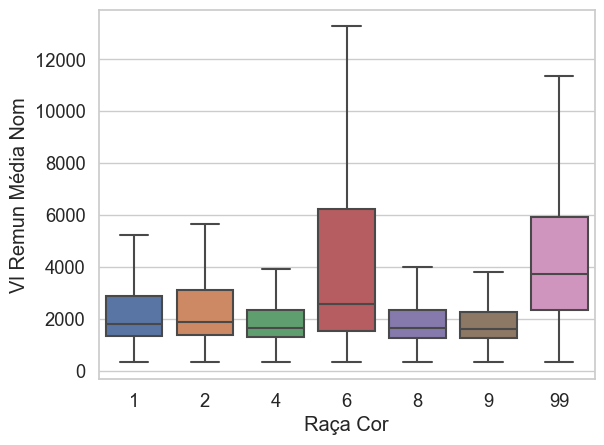

In [35]:
#Box plot
sns.boxplot(x = 'Raça Cor', y = 'Vl Remun Média Nom', data=df_v0, showfliers = False)
#plt.show()

Parece que existe uma diferença salarial dependendo da etnia.

Contando a quantidade de dados que tempo por etnia, para verificar se existe muita variação, temos:

In [38]:
df_v0.groupby('Raça Cor')['Vl Remun Média Nom'].count()

Raça Cor
1       21385
2     9136554
4      979895
6      102675
8     4168469
9     1661198
99    1507508
Name: Vl Remun Média Nom, dtype: int64

* 1. Indígena
* 2. Branca
* 4. Preta
* 6. Amarela
* 8. Parda
* 9. Nao identificado
* 99. Ignorado

Como o objetivo deste projeto é entender a diferença entre negros (pretos + pardos) e brancos, para dar continuidade irei trabalhar apenas com trabalhadores Brancos, pretos e pardos. Esta decisão foi feita porque este é o foco e, além disso percebe-se dados que poderiam enviesar as análises, como o número reduzido de trabalhadores se alto declarando como amarelos e com valores superiores aos demais, e além disso, existem mais de 3 milhoes de resgistros com este dado ignorado (99) ou não identificado (9).

In [39]:
raca_list = [2,4,8]

df_v1 = df_v0[df_v0['Raça Cor'].isin(raca_list)]

<AxesSubplot: xlabel='Raça Cor', ylabel='Vl Remun Média Nom'>

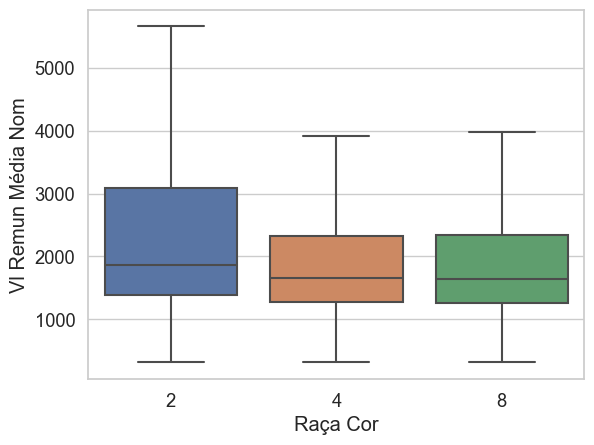

In [38]:
sns.boxplot(x = 'Raça Cor', y = 'Vl Remun Média Nom', data=df_v1, showfliers = False)

Separando por CBO para ver como a mediana salarial é distribuida por tipo de trabalho (peguei a feature que fiz com apenas os 2 primeiros numeros da CBO - com menos subcategorias) A tabela abaixo está exibindo até o segundo nível da CBO

<AxesSubplot: xlabel='CBO_2', ylabel='Vl Remun Média Nom'>

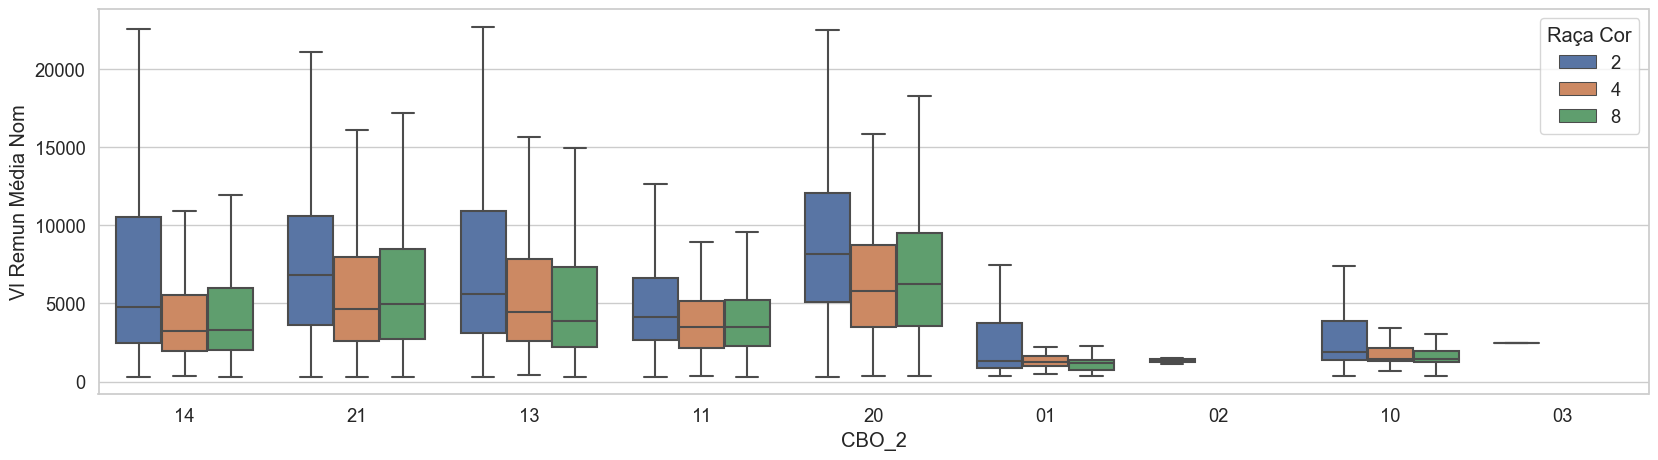

In [39]:
cbo2_list1 = ['01', '02', '03', '10', '11', '13', '14', '20', '21']

df_v1_cbo_1 = df_v1[df_v1['CBO_2'].isin(cbo2_list1)]

plt.figure(figsize=(20,5))

sns.boxplot(x='CBO_2', y='Vl Remun Média Nom', hue='Raça Cor',
                 data=df_v1_cbo_1, showfliers = False)

<AxesSubplot: xlabel='CBO_2', ylabel='Vl Remun Média Nom'>

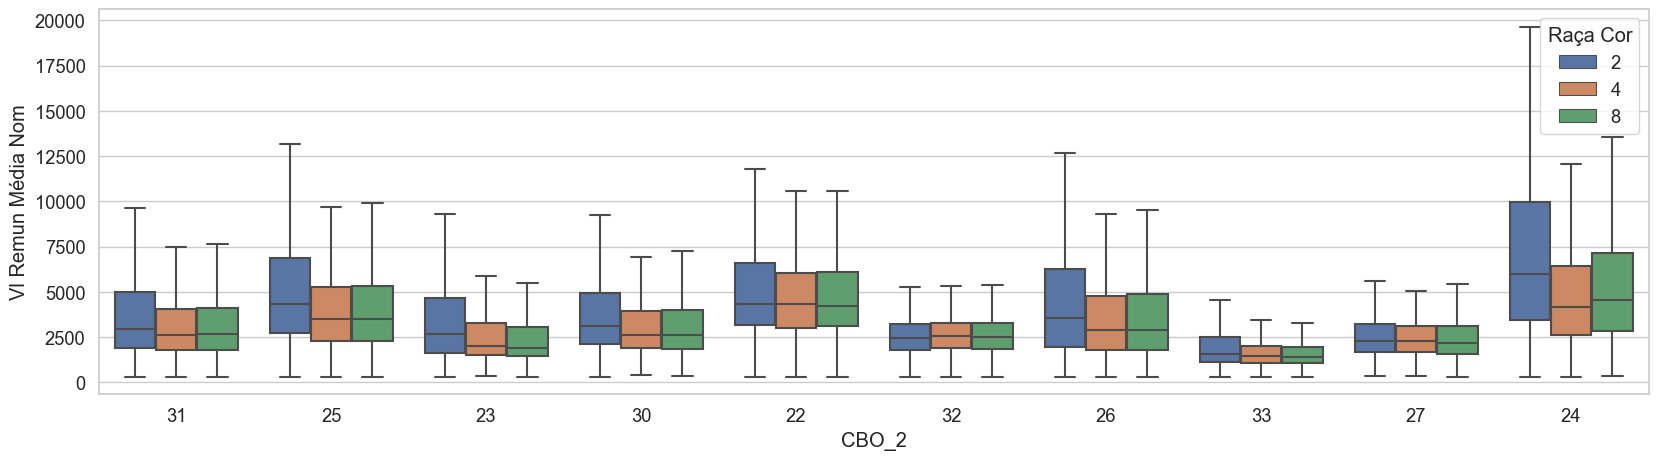

In [40]:
cbo2_list2 = ['22', '23', '24', '25', '26', '27', '30', '31', '32', '33']

df_v1_cbo_2 = df_v1[df_v1['CBO_2'].isin(cbo2_list2)]

plt.figure(figsize=(20,5))

sns.boxplot(x='CBO_2', y='Vl Remun Média Nom', hue='Raça Cor',
                 data=df_v1_cbo_2, showfliers = False)

<AxesSubplot: xlabel='CBO_2', ylabel='Vl Remun Média Nom'>

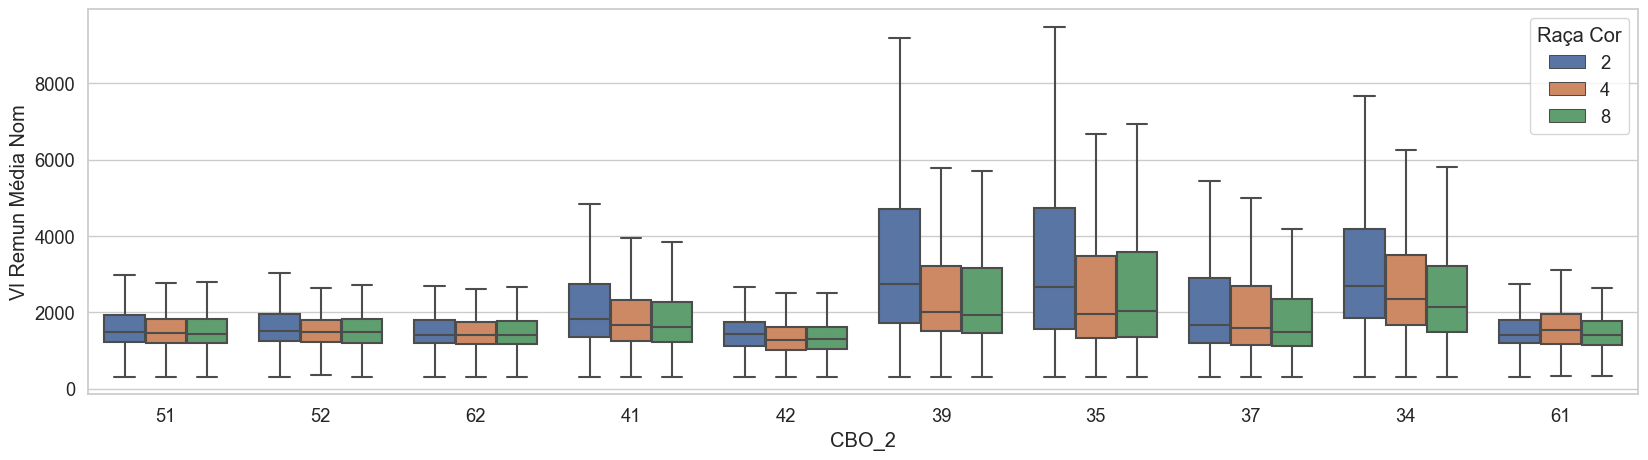

In [41]:
cbo2_list3 = ['34', '35', '37', '39', '41', '42', '51', '52', '61', '62']

df_v1_cbo_3 = df_v1[df_v1['CBO_2'].isin(cbo2_list3)]

plt.figure(figsize=(20,5))

sns.boxplot(x='CBO_2', y='Vl Remun Média Nom', hue='Raça Cor',
                 data=df_v1_cbo_3, showfliers = False)

<AxesSubplot: xlabel='CBO_2', ylabel='Vl Remun Média Nom'>

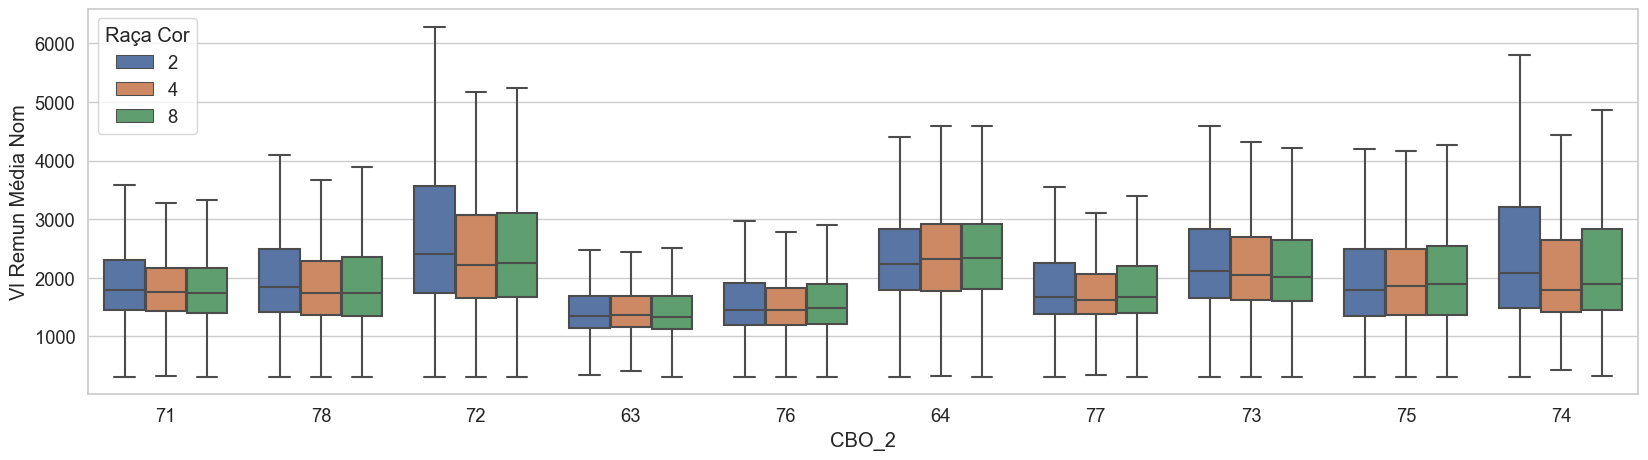

In [42]:
cbo2_list4 = ['63', '64', '71', '72', '73', '74', '75', '76', '77', '78']

df_v1_cbo_4 = df_v1[df_v1['CBO_2'].isin(cbo2_list4)]

plt.figure(figsize=(20,5))

sns.boxplot(x='CBO_2', y='Vl Remun Média Nom', hue='Raça Cor',
                 data=df_v1_cbo_4, showfliers = False)

<AxesSubplot: xlabel='CBO_2', ylabel='Vl Remun Média Nom'>

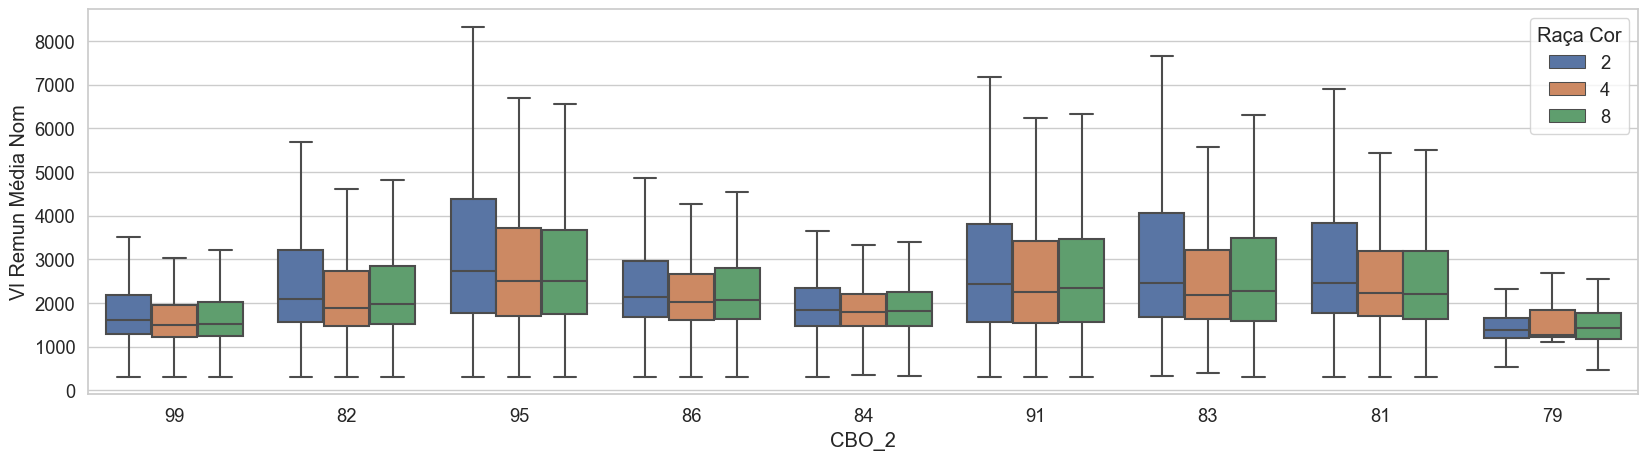

In [43]:
cbo2_list5 = ['79', '81', '82', '83', '84', '86', '91', '95', '99']

df_v1_cbo_5 = df_v1[df_v1['CBO_2'].isin(cbo2_list5)]

plt.figure(figsize=(20,5))

sns.boxplot(x='CBO_2', y='Vl Remun Média Nom', hue='Raça Cor',
                 data=df_v1_cbo_5, showfliers = False)

## Inferencia estatistica

A análise a partir do box-plot nos mostra que pode existir uma diferença das medias na maioria das ocupações, quando separamos por etnia, mas não podemos dar certeza dessa diferença. Para entendermos essa diferença entre negros e brancos, vamos fazer uma análise de inferência estatística.

### Teste de hipotese
Ho: Medias dos grupos são iguais - Remuneração semelhante (mediana estatisticamente iguais) entre as etnias

H1: Remuneração diferentente entre as etnias

In [45]:
# verificando a inferência nos salários de Brancos e Pretos
# utilizando o t-test para a média de duas séries

import scipy
from scipy import stats

stats.ttest_ind(a=df_v1[df_v1['Raça Cor'] == 2]["Vl Remun Média Nom"],
                b=df_v1[df_v1['Raça Cor'] == 4]["Vl Remun Média Nom"], 
                equal_var = False)

Ttest_indResult(statistic=376.8302768369955, pvalue=0.0)

Como o p-value é menor que 0.05 podemos afirmar que a média de salários entre pessoas Brancas e Pretas é estatísticamente diferente.

In [47]:
# verificando a inferência nos salários de Brancos e Pardos
# utilizando o t-test para a média de duas séries

import scipy
from scipy import stats

stats.ttest_ind(a=df_v1[df_v1['Raça Cor'] == 2]["Vl Remun Média Nom"],
                b=df_v1[df_v1['Raça Cor'] == 8]["Vl Remun Média Nom"], 
                equal_var = False)

Ttest_indResult(statistic=501.62111749042754, pvalue=0.0)

Como o p-value é menor que 0.05 podemos afirmar que a média de salários entre pessoas Brancas e Pardas é estatísticamente diferente.

In [48]:
# verificando a inferência nos salários de Brancos e Pardos
# utilizando o t-test para a média de duas séries
stats.ttest_ind(a=df_v1[df_v1['Raça Cor'] == 2]["Vl Remun Média Nom"],
                b=df_v1[df_v1['Raça Cor'] != 2]["Vl Remun Média Nom"], 
                equal_var = False)

Ttest_indResult(statistic=528.6328636628485, pvalue=0.0)

Como o p-value é menor que 0.05 podemos afirmar que a média de salários entre pessoas Brancas e Negras (pretas e pardas) é estatísticamente diferente.

Aplicando o t-test para médias entre as salários entre Brandos e Negros para cada classe de ocupação

In [49]:
# aplicando o t-test para médias de duas séries entre Deputy Sheriff e todos os JobTitles

jobtitle = []
pvalues = []
for i in df_v1['CBO_2'].value_counts()[:49].index:
    df_v1_filtro = df_v1[df_v1['CBO_2'] == i]
    jobtitle_tstats = stats.ttest_ind(a=df_v1_filtro[df_v1_filtro['Raça Cor'] == 2]["Vl Remun Média Nom"],
                                      b=df_v1_filtro[df_v1_filtro['Raça Cor'] != 2]["Vl Remun Média Nom"], 
                                      equal_var = False)
    jobtitle.append(i)
    pvalues.append(jobtitle_tstats[1])
    
# colocando os valores em um DataFrame e listando
inference=pd.DataFrame(list(zip(jobtitle,pvalues)),columns =['jobtitle', 'pvalues'])
inference.sort_values(by=['pvalues'],ascending=False)

,jobtitle,pvalues
31,37,5.056086e-01
46,79,4.657368e-01
34,75,3.293300e-01
43,61,4.144612e-02
36,63,4.165603e-03
11,32,2.851834e-03
45,01,3.898842e-05
40,27,7.122478e-06
44,10,8.676018e-10
23,64,1.009839e-10


In [50]:
# listando os valores com p-value maior que 0,05, isso quer dizer que não existe diferença nas médias entre etnias
list(inference.jobtitle[inference.pvalues > 0.05])

['37', '75', '79']

Isso mostra que dentro das 49 ocupações diferentes, apenas 4 delas não podemos afirmar que existe difereça estatística entre os salários

Agora que entendemos que existe realmente diferença salarial entre as diferentes etnias, vamos olhar para as variáveis existentes e visualizar a relação entre elas.

## Correlação

In [40]:
#Função para formatar a matriz de correlação
def plot_corr_matrix(corr_matrix, size=(14, 14)):
  # Set up the matplotlib figure
  fig, ax = plt.subplots(figsize=size)

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_matrix.corr(), mask=mask, cmap=cmap, vmax=.99, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
# substituind NaN por 0
df_v2 = df_v1.fillna(0)

In [44]:
df_v2['CBO_2'] = df_v2['CBO_2'].astype(int)

In [45]:
# Variavel de interesse
target = 'Vl Remun Média Nom'
print('target:', target)

# Variaveis numericas
num_vars = df_v2.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

# Variaveis categorical
cat_vars = df_v2.select_dtypes(exclude=['int', 'float']).columns.tolist()
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

target: Vl Remun Média Nom
numerical vars(26): ['CNAE 2.0 Classe', 'Vínculo Ativo 31/12', 'Faixa Etária', 'Faixa Hora Contrat', 'Faixa Tempo Emprego', 'Escolaridade após 2005', 'Qtd Hora Contr', 'Idade', 'Ind CEI Vinculado', 'Ind Simples', 'Mun Trab', 'Município', 'Nacionalidade', 'Natureza Jurídica', 'Ind Portador Defic', 'Qtd Dias Afastamento', 'Raça Cor', 'Sexo Trabalhador', 'Tamanho Estabelecimento', 'Tempo Emprego', 'Tipo Estab', 'Tipo Vínculo', 'IBGE Subsetor', 'Ind Trab Intermitente', 'Ind Trab Parcial', 'CBO_2']
categorical vars(0): []


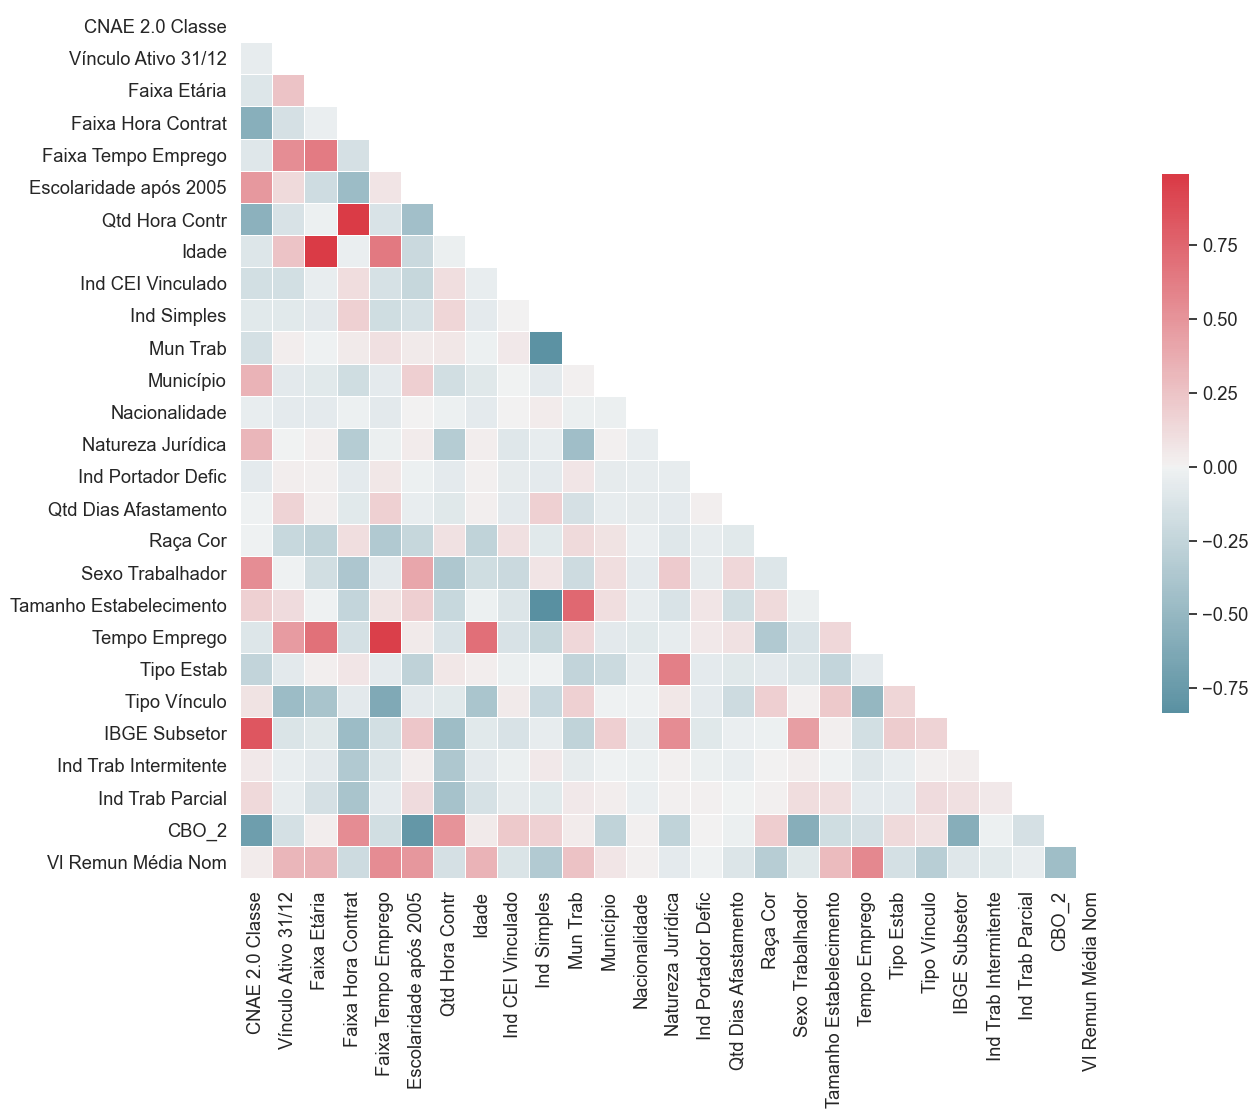

In [46]:
corr_matrix = df_v2[num_vars + [target]].corr()
plot_corr_matrix(corr_matrix)

In [47]:
corr_matrix[target].sort_values(ascending=False)

Vl Remun Média Nom         1.000000
Tempo Emprego              0.306237
Escolaridade após 2005     0.296363
Faixa Tempo Emprego        0.267451
Faixa Etária               0.184651
Idade                      0.176154
Tamanho Estabelecimento    0.148416
Vínculo Ativo 31/12        0.128660
Mun Trab                   0.123367
Município                  0.056860
Nacionalidade              0.037501
Ind Portador Defic        -0.000865
CNAE 2.0 Classe           -0.004101
Natureza Jurídica         -0.010291
Ind Trab Parcial          -0.011645
Ind CEI Vinculado         -0.012519
Qtd Hora Contr            -0.014777
Ind Trab Intermitente     -0.022072
Tipo Estab                -0.033110
IBGE Subsetor             -0.050270
Qtd Dias Afastamento      -0.053713
Faixa Hora Contrat        -0.061215
Sexo Trabalhador          -0.076413
Tipo Vínculo              -0.107049
Raça Cor                  -0.109493
Ind Simples               -0.166488
CBO_2                     -0.276814
Name: Vl Remun Média Nom, dt

Vemos que escolaridade é uma das variáveis mais importantes para a Remuneração. Para facilitar as análises e entender melhor como a etnia pode afetar modelos de predição salarial, seguirei com os dados de trabalhadores com `Faixa Etária` entre 18 e 39 anos.

In [50]:
df_v2.groupby('Faixa Etária')['Faixa Etária'].count()

Faixa Etária
1        240
2      68772
3    2436789
4    2235814
5    4416751
6    3061038
7    1910117
8     155397
Name: Faixa Etária, dtype: int64

In [51]:
lista_idade = [3, 4, 5]
df_v3 = df_v2[df_v2['Faixa Etária'].isin(lista_idade)].reset_index(drop=True)

In [53]:
df_v3.head()

,CNAE 2.0 Classe,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Estab,Tipo Vínculo,IBGE Subsetor,Ind Trab Intermitente,Ind Trab Parcial,CBO_2
0,81214,0,4,6,3,1,44,27,0,1,0,351300,10,2305,0,0,8,1141.23,1,6,8.4,1,10,21,0,0,51
1,47822,0,4,6,1,1,44,25,0,0,355030,355030,10,2062,0,0,8,526.72,1,5,1.9,1,10,16,0,0,52
2,11216,0,5,6,1,1,44,35,0,0,350600,350600,10,2062,0,0,8,2527.21,1,7,2.9,1,10,13,0,0,78
3,43304,0,5,6,1,1,43,34,0,0,0,355620,10,2062,0,0,2,1320.64,1,2,1.7,1,10,15,0,0,78
4,86216,0,5,6,4,1,44,37,0,0,355030,355030,10,2062,0,0,2,1330.74,1,8,13.1,1,10,22,0,0,78


In [54]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9089354 entries, 0 to 9089353
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CNAE 2.0 Classe          int64  
 1   Vínculo Ativo 31/12      int64  
 2   Faixa Etária             int64  
 3   Faixa Hora Contrat       int64  
 4   Faixa Tempo Emprego      int64  
 5   Escolaridade após 2005   int64  
 6   Qtd Hora Contr           int64  
 7   Idade                    int64  
 8   Ind CEI Vinculado        int64  
 9   Ind Simples              int64  
 10  Mun Trab                 int64  
 11  Município                int64  
 12  Nacionalidade            int64  
 13  Natureza Jurídica        int64  
 14  Ind Portador Defic       int64  
 15  Qtd Dias Afastamento     int64  
 16  Raça Cor                 int64  
 17  Vl Remun Média Nom       float64
 18  Sexo Trabalhador         int64  
 19  Tamanho Estabelecimento  int64  
 20  Tempo Emprego            float64
 21  Tipo Est

## Visualização salarial

<AxesSubplot: xlabel='Vl Remun Média Nom', ylabel='Density'>

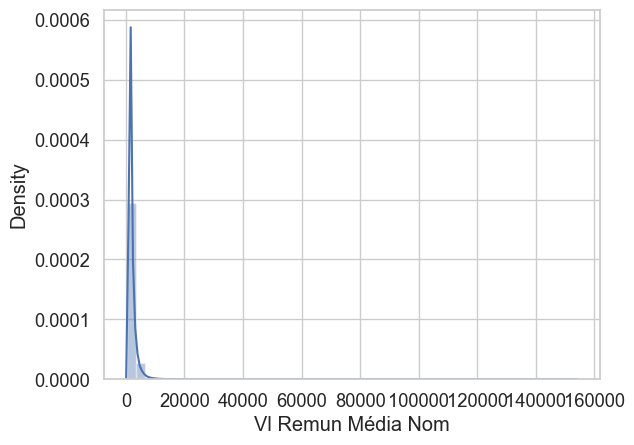

In [65]:
#histograma (ver densidade de ocorrencias)
sns.distplot(df_v3['Vl Remun Média Nom'], kde=True)

Temos uma distribuição salarial com assimetria positiva, para normalizar os dados vamos fazer a transformação logaritmica da remuneração

In [55]:
#transformação logaritmica dos salarios
# normalizando todos os valores de salário
from scipy.stats import norm
df_v3['logSalario'] = np.log(df_v3['Vl Remun Média Nom'])

<AxesSubplot: ylabel='Density'>

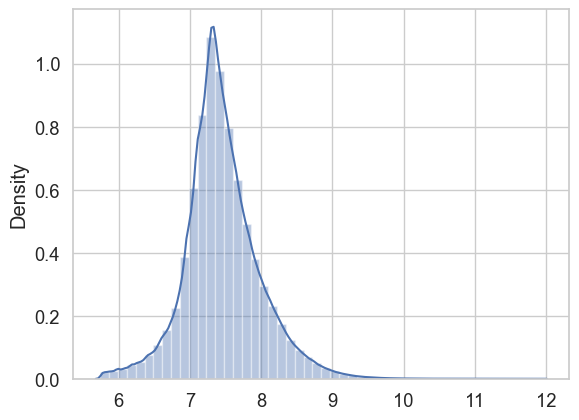

In [67]:
#histograma (ver densidade de ocorrencias)
sns.distplot(x=df_v3['logSalario'], kde=True)

Para dar continuidade às análises, usarei uma amostra dos dados.

In [56]:
df_sample = df_v3.sample(frac=0.01, random_state=42)

In [57]:
# converting to CSV file
df_sample.to_csv("sample_projeto_2.csv")

Para visualizar algumas variaveis em relação ao salário e a raça

<AxesSubplot: xlabel='Vl Remun Média Nom', ylabel='Tempo Emprego'>

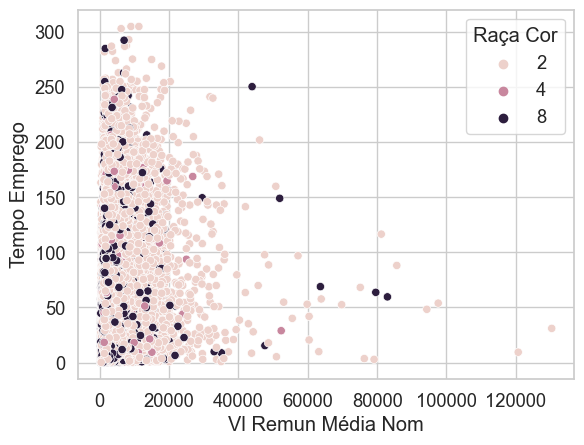

In [202]:
sns.scatterplot(data=df_sample, x='Vl Remun Média Nom', y='Tempo Emprego', hue="Raça Cor")

## Modelo de Regressão Linear

Usando as features com maiores correlações para montar o modelo

In [59]:
# Variavel de interesse
target = 'logSalario'
print('target:', target)

# Variaveis numericas
num_vars = df_sample.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove(target)
num_vars.remove('Vl Remun Média Nom')
print(f'numerical vars({len(num_vars)}): {num_vars}')

# Variaveis categorical
cat_vars = df_sample.select_dtypes(exclude=['int', 'float']).columns.tolist()
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

target: logSalario
numerical vars(26): ['CNAE 2.0 Classe', 'Vínculo Ativo 31/12', 'Faixa Etária', 'Faixa Hora Contrat', 'Faixa Tempo Emprego', 'Escolaridade após 2005', 'Qtd Hora Contr', 'Idade', 'Ind CEI Vinculado', 'Ind Simples', 'Mun Trab', 'Município', 'Nacionalidade', 'Natureza Jurídica', 'Ind Portador Defic', 'Qtd Dias Afastamento', 'Raça Cor', 'Sexo Trabalhador', 'Tamanho Estabelecimento', 'Tempo Emprego', 'Tipo Estab', 'Tipo Vínculo', 'IBGE Subsetor', 'Ind Trab Intermitente', 'Ind Trab Parcial', 'CBO_2']
categorical vars(0): []


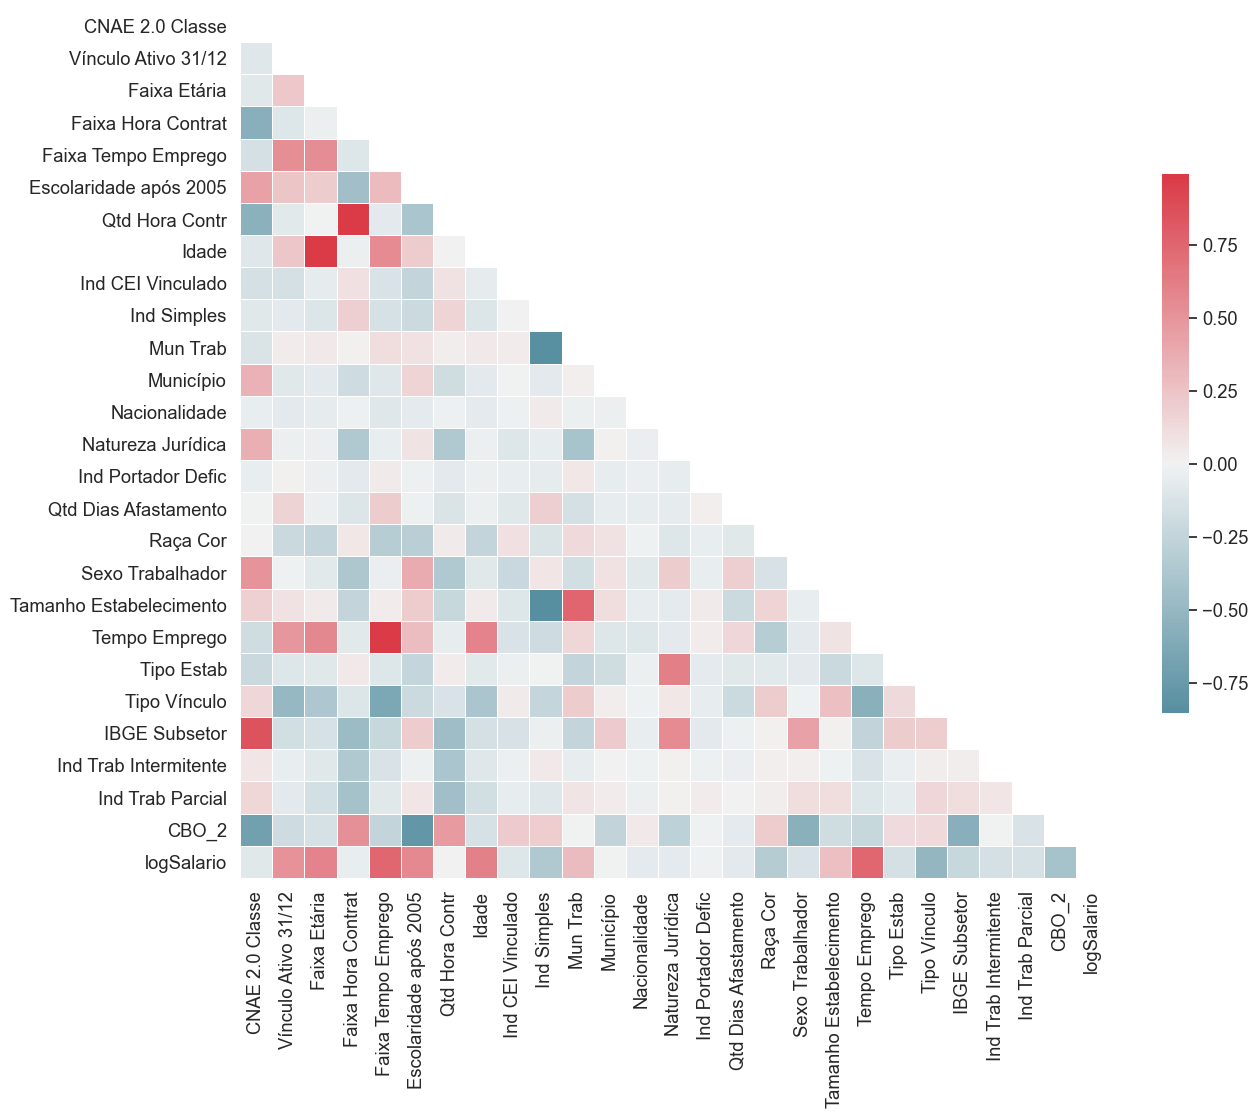

In [60]:
corr_matrix = df_sample[num_vars + [target]].corr()
plot_corr_matrix(corr_matrix)

In [61]:
corr_matrix[target].sort_values(ascending=False)

logSalario                 1.000000
Faixa Tempo Emprego        0.438549
Tempo Emprego              0.425832
Escolaridade após 2005     0.369439
Idade                      0.340886
Faixa Etária               0.329567
Vínculo Ativo 31/12        0.258324
Tamanho Estabelecimento    0.167675
Mun Trab                   0.149595
Qtd Hora Contr             0.071692
Município                  0.040017
Faixa Hora Contrat         0.013444
Natureza Jurídica          0.011372
Nacionalidade              0.004575
Ind Portador Defic         0.000668
Ind CEI Vinculado         -0.001434
Tipo Estab                -0.040244
CNAE 2.0 Classe           -0.051798
Ind Trab Parcial          -0.055103
Ind Trab Intermitente     -0.057121
Qtd Dias Afastamento      -0.057694
Sexo Trabalhador          -0.097304
IBGE Subsetor             -0.099475
Raça Cor                  -0.118348
Ind Simples               -0.215410
Tipo Vínculo              -0.235748
CBO_2                     -0.270847
Name: logSalario, dtype: flo

Pegando apenas algumas variáveis para treinar o modelo de regressão

In [62]:
features_list = ['logSalario','Escolaridade após 2005', 'Faixa Tempo Emprego','Idade','Tamanho Estabelecimento','Sexo Trabalhador' ,'Raça Cor','Tipo Vínculo','Ind Simples','CBO_2']

df_sample_v1 = df_sample[features_list]

In [63]:
X = df_sample_v1.drop('logSalario', axis=1)
y = df_sample_v1['logSalario']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
#Regressao linear
from sklearn.linear_model import LinearRegression

rlm = LinearRegression()
rlm.fit(X_train, y_train)

LinearRegression()

#### Metricas

Conforme nós vamos criando e alterando diversos modelos precisamos poder compará-los para saber se estamos indo na direção correta.

RMSE: Root-mean-square-error ou a raiz do erro quadrático médio. É o desvio padrão dos resíduos que é a diferença do valor real para o valor predito

MAE: Mean Absolute Error ou o Erro médio absoluto. Parecido com RMSE, mas ao invés de elevar o resíduo o quadrado, soma-se o módulo.

R² e R²-ajustado: Já vimos que o R² diz o quanto nosso modelo explica a variação da nossa variável dependente. O R²-ajustado vai levar em conta também a quantidade de variáveis independentes que o modelo contém, então ele vai penalizar quando tiver variáveis que não contribuem para o modelo.

In [66]:
# funcao para imprimir as metricas
from sklearn.metrics import mean_squared_error, r2_score

def imprimir_metricas(model, X_train, X_test, y_train, y_test, name):
    train_pred = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, train_pred)**0.5
    r2_train = r2_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, test_pred)**0.5
    r2_test = r2_score(y_test, test_pred)

    print(f'''***{name}***
    treino
    RMSE: {round(rmse_train, 2)}
    R2: {round(r2_train, 2)}\n
    teste:
    RMSR: {round(rmse_test, 2)}
    R2: {round(r2_test, 2)}''')

In [67]:
imprimir_metricas(rlm, X_train, X_test, y_train, y_test, 'Regressão Linear')

***Regressão Linear***
    treino
    RMSE: 0.48
    R2: 0.42

    teste:
    RMSR: 0.48
    R2: 0.4


Não ficou um bom modelo. Agora tentarei análisar as features a partir do random forest

## Feature Importance com RandomForest

Splitando os dados em treino e teste

In [68]:
#Função para criar Datasets de Treino, validação e teste
def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features],
        df[target],
        test_size=test_size,
        random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

In [69]:
# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report

In [70]:
target = 'logSalario'
features = df_sample.columns.values.tolist()
features.remove(target)
features.remove('Vl Remun Média Nom')

In [71]:
(
  X_train, X_test, 
  X_val, y_train, 
  y_test, y_val
) = train_test_valid_split(df_sample, features=features, target=target, test_size=0.3, valid_size=0.5, random_state=42)

print('X Train shape', X_train.shape)
print('X Val shape', X_val.shape)
print('X Test shape', X_test.shape)

X Train shape (63625, 26)
X Val shape (13635, 26)
X Test shape (13634, 26)


### Fitando Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf_baseline = RandomForestRegressor(random_state=42)
# Treino
rf_baseline.fit(X_train, y_train)

y_val_baseline_pred = rf_baseline.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

,metric,validation
0,RMSE,0.37
1,MAE,0.26
2,R^2,0.66
3,MAPE,0.03
4,Avg. target,7.52
5,Avg. Prediction,7.53


#### Achando melhores hiperparametros

In [74]:
# hiperparams: n_estimators: [], max_features: [], min_samples_leaf: []
for n_estimators in [10, 30, 50, 70, 100, 150, 200]:
  print(f'Random forest, with n_estimators {n_estimators}')
  rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with n_estimators 10
rmse: 0.3836214682428253

Random forest, with n_estimators 30
rmse: 0.3707996134768224

Random forest, with n_estimators 50
rmse: 0.3683380435250932

Random forest, with n_estimators 70
rmse: 0.3670791390082204

Random forest, with n_estimators 100
rmse: 0.3660692381833243

Random forest, with n_estimators 150
rmse: 0.36533598171594317

Random forest, with n_estimators 200
rmse: 0.36512541245197405



In [75]:
# hiperparams: n_estimators: [200], max_features: [], min_samples_leaf: []
for max_features in ['sqrt', 0.1, 0.2, 0.3, 0.4, 0.6]:
  print(f'Random forest, with max_features {max_features}')
  rf_model = RandomForestRegressor(n_estimators=200, max_features=max_features, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with max_features sqrt
rmse: 0.36042160289508274

Random forest, with max_features 0.1
rmse: 0.3661757519677743

Random forest, with max_features 0.2
rmse: 0.36042160289508274

Random forest, with max_features 0.3
rmse: 0.3601498230831993

Random forest, with max_features 0.4
rmse: 0.360982943220091

Random forest, with max_features 0.6
rmse: 0.36250532499678106



In [76]:
# hiperparams: n_estimators: [200], max_features: [0.3], min_samples_leaf: []
for min_samples_leaf in list(range(1,6)):
  print(f'Random forest, with min_samples_leaf {min_samples_leaf}')
  rf_model = RandomForestRegressor(n_estimators=200, max_features=0.3, min_samples_leaf= min_samples_leaf, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with min_samples_leaf 1
rmse: 0.3601498230831993

Random forest, with min_samples_leaf 2
rmse: 0.3601520740060028

Random forest, with min_samples_leaf 3
rmse: 0.36104155351111433

Random forest, with min_samples_leaf 4
rmse: 0.3620837362002243

Random forest, with min_samples_leaf 5
rmse: 0.3630344549576387



#### Melhores hiperparametros

In [77]:
# hiperparams: n_estimators: [200], max_features: [0.3], min_samples_leaf: [2]
rf_model = RandomForestRegressor(n_estimators=200, max_features=0.3, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
metrics_report(y_val, y_val_pred, 'validation')

,metric,validation
0,RMSE,0.36
1,MAE,0.26
2,R^2,0.67
3,MAPE,0.03
4,Avg. target,7.52
5,Avg. Prediction,7.53


### Importancia das variáveis

In [78]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html
print('Running permutation feature importance')
permutation_result = permutation_importance(rf_model, X_val, y_val, n_repeats=5, random_state=42)

Running permutation feature importance


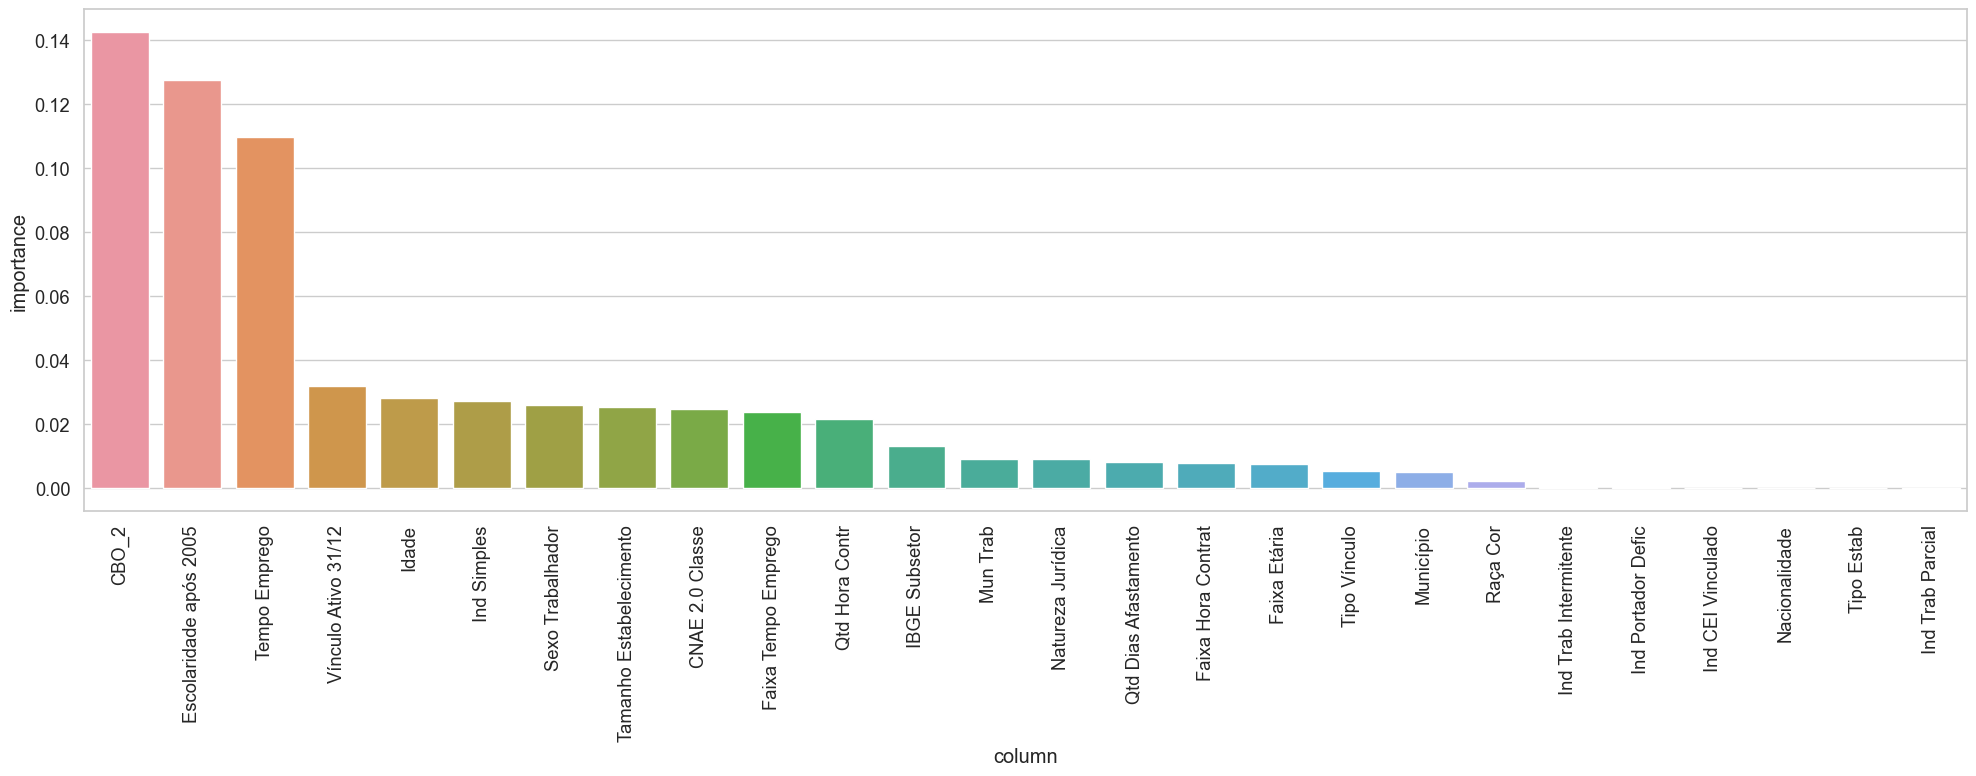

In [79]:
importances = pd.DataFrame({'column' : X_val.columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(20,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [80]:
# Getting the top 10 best features
best_features = importances.head(20).column.tolist()
best_features.remove('Tempo Emprego')
best_features.remove('Qtd Dias Afastamento')
print(best_features)

['CBO_2', 'Escolaridade após 2005', 'Vínculo Ativo 31/12', 'Idade', 'Ind Simples', 'Sexo Trabalhador', 'Tamanho Estabelecimento', 'CNAE 2.0 Classe', 'Faixa Tempo Emprego', 'Qtd Hora Contr', 'IBGE Subsetor', 'Mun Trab', 'Natureza Jurídica', 'Faixa Hora Contrat', 'Faixa Etária', 'Tipo Vínculo', 'Município', 'Raça Cor']


### Retreinando o modelo com as melhores features

In [82]:
# Fitting the final RandomForest model
rf_model = RandomForestRegressor(n_estimators=200, max_features=0.3, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train[best_features], y_train)

# Computing predictions
y_train_pred = rf_model.predict(X_train[best_features])
y_val_pred = rf_model.predict(X_val[best_features])
y_test_pred = rf_model.predict(X_test[best_features])

# Computing the train, validation and test model performance metrics
train_report = metrics_report(y_train, y_train_pred, 'train')
val_report = metrics_report(y_val, y_val_pred, 'validation')
test_report = metrics_report(y_test, y_test_pred, 'test')

final_report = pd.concat([train_report, val_report[['validation']],  test_report[['test']]], axis=1)

print(f'Baseline report (total features: {len(features)})')
print(baseline_report)
print('')
print(f'Final report (total features: {len(best_features)})')
print(final_report)

Baseline report (total features: 26)
            metric  validation
0             RMSE        0.37
1              MAE        0.26
2              R^2        0.66
3             MAPE        0.03
4      Avg. target        7.52
5  Avg. Prediction        7.53

Final report (total features: 18)
            metric  train  validation  test
0             RMSE   0.14        0.38  0.38
1              MAE   0.10        0.27  0.27
2              R^2   0.95        0.64  0.63
3             MAPE   0.01        0.04  0.04
4      Avg. target   7.53        7.52  7.52
5  Avg. Prediction   7.53        7.53  7.53


Computanto a importancia das features do modelo final no dataset de test (held-out testing set)

Running permutation feature importance with the final model on the held-out testing set


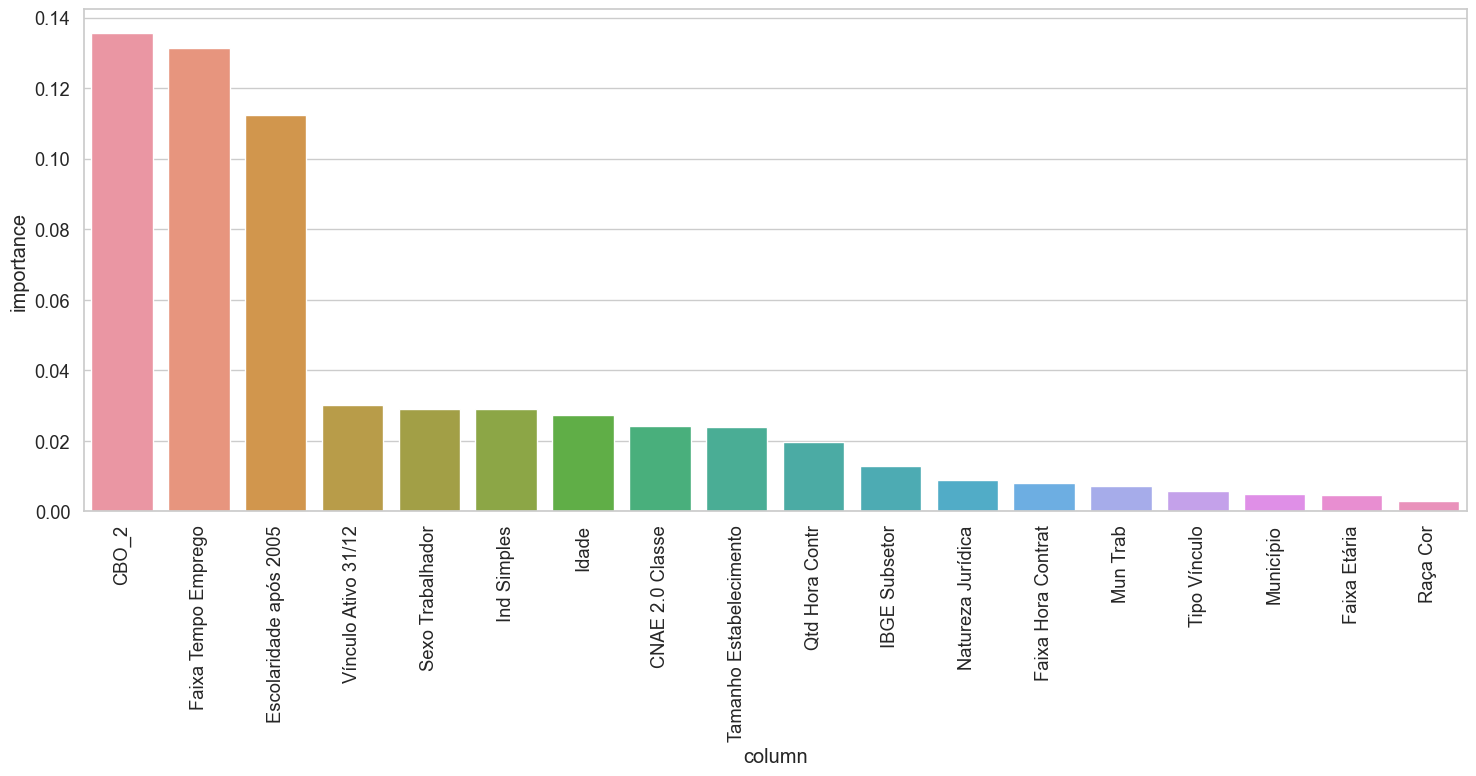

In [83]:
print('Running permutation feature importance with the final model on the held-out testing set')
permutation_result = permutation_importance(rf_model, X_test[best_features], y_test, n_repeats=5, random_state=42)

importances = pd.DataFrame({'column' : X_test[best_features].columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

O modelo não ficou muito bom, porém podemos perceber que a variável `Raça Cor` tem alguma importância no modelo.

O objetivo inicial do trabalho era treinar dois modelos de regressão, um primeiro com as principais variáveis do dataset de forma a prever os salários do estado de São Paulo e um segundo modelo no qual a variável `Raça Cor` seria removida. Desta maneira seria possível entender/visualizar o quanto a etnia impacta nas predições salariais e como realmente existe viés neste tipo de informação. No entanto, na aula `Ética na Prática`, entendi que fazer esta remoção da variável poderia trazer problemas ao modelo, principalmente por não levar em conta possíveis correlações entre as variáveis, levando para o modelo uma variável altamente correlacionada com etnia, e ao final efetivamente usar esta informação no modelo.  A solução para isto foi pensar em processos responsáveis de desenvolvimento de Inteligência Artificial (IA).

## Responsible AI dashboard

Quando um cientista de dados descobre um problema de imparcialidade com uma ferramenta, ele precisa entender quais dados ou fatores de modelo estão na raiz do problema antes de tomar qualquer medida de mitigação. Para tomar esta decisão existem diferentes ferramentas que auxiliam neste estudo. Para o meu estudo utilizei o [Responsible AI dashboard](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/responsible-ai-dashboard-a-one-stop-shop-for-operationalizing/ba-p/3030944), um único painel que reúne várias ferramentas maduras de responsabilidade IA nas áreas de interpretação de aprendizado de máquina, avaliação e mitigação de injustiças, análise de erros, inferência causal e análise contrafactual para uma avaliação holística e depuração de modelos e informações decisões de negócios. O painel aborda os problemas de descoberta e fragmentação da ferramenta, permitindo que você analise seus dados em duas etapas distintas:
* Análise do modelo: Avalie modelos de aprendizado de máquina identificando erros de modelo, diagnosticando por que esses erros estão acontecendo e mitigando-os.
* Tomada de decisão responsável: Aumente suas habilidades de tomada de decisão orientada por dados, abordando questões como "qual é a mudança mínima que o usuário final pode aplicar em seus recursos para obter um resultado diferente do modelo?"

<img src="Imagens\debug.PNG" style="width:500px"/>
<br>
<img src="Imagens\Decision.PNG" style="width:500px"/>

Do modelo inicial foi realizada algumas modificações para a realização a análise no Dashboard de Responsible AI. Para isto o modelo inicial de regressão foi transformado em um modelo de classificação. Para o modelo de classificação foi criada uma variável, onde a remuneração média foi dividida em dois grupos diferentes, aqueles que ganham igual ou abaixo da mediana salarial e aqueles que ganham acima da mediana. Desta forma a população de estudo seria dividida em 50/50. 

In [ ]:
!pip install raiwidgets
!pip install --upgrade pandas

In [ ]:
!yarn install
!yarn buildall
!pip install --user statsmodels --upgrade

In [ ]:
from raiwidgets import ResponsibleAIDashboard
from responsibleai import RAIInsights

In [84]:
median_target = df_sample['Vl Remun Média Nom'].median()

In [98]:
median_target

1663.605

In [85]:
df_sample['Salario_maiorMediana'] = [1 if s >=median_target else 0 for s in df_sample['Vl Remun Média Nom']] 

In [86]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90894 entries, 175407 to 563387
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CNAE 2.0 Classe          90894 non-null  int64  
 1   Vínculo Ativo 31/12      90894 non-null  int64  
 2   Faixa Etária             90894 non-null  int64  
 3   Faixa Hora Contrat       90894 non-null  int64  
 4   Faixa Tempo Emprego      90894 non-null  int64  
 5   Escolaridade após 2005   90894 non-null  int64  
 6   Qtd Hora Contr           90894 non-null  int64  
 7   Idade                    90894 non-null  int64  
 8   Ind CEI Vinculado        90894 non-null  int64  
 9   Ind Simples              90894 non-null  int64  
 10  Mun Trab                 90894 non-null  int64  
 11  Município                90894 non-null  int64  
 12  Nacionalidade            90894 non-null  int64  
 13  Natureza Jurídica        90894 non-null  int64  
 14  Ind Portador Def

In [87]:
lista2 = ['Vl Remun Média Nom', 'logSalario']
df_sample_v2 = df_sample.drop(columns = lista2)

In [88]:
X1 = df_sample_v2.drop('Salario_maiorMediana', axis=1)
y1 = df_sample_v2['Salario_maiorMediana']

In [89]:
target_feature1 = 'y'
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

train_data1 = X_train1.copy()
test_data1 = X_test1.copy()
train_data1[target_feature1] = y_train1
test_data1[target_feature1] = y_test1

In [90]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(random_state=0)
model = clf.fit(X_train1, y_train1)

In [91]:
test_data_sample1 = test_data1.sample(n=500, random_state=42)
train_data_sample1 = train_data1.sample(n=8000, random_state=42)

In [ ]:
rai_insights = RAIInsights(model, train_data_sample1, test_data_sample1, target_feature1, 'classification', categorical_features=[])

In [ ]:
# Add model error analysis for identification
rai_insights.error_analysis.add()

# Add model interpretability for diagnosis
rai_insights.explainer.add()

# Generate 10 counterfactuals for each datapoint, leading to opposite class predictions
rai_insights.counterfactual.add(10, desired_class='opposite')

In [ ]:
# Compute insights
rai_insights.compute()

# Load the Responsible AI dashboard
ResponsibleAIDashboard(rai_insights)

A partir desta variável foi possível criar um modelo de classificação. Este modelo foi usado para produzir o Dashboard de Responsable AI. 

**Feature Importance**

Conseguimos entender como as variáveis tem pesos diferentes para as diferentes classes de etnia do modelo e o valor do modelo como um todo.

<br>
<img src="Imagens\importance.PNG" style="width:800px"/>
<br>

**Identificação** 

O painel começa com os recursos de análise de erros, para identificar grupos de dados com uma taxa de erro mais alta em relação à taxa de erro geral de referência. O painel permite a exploração de erros usando uma árvore de decisão guiada por erros ou um mapa de calor de erros.

<br>
<img src="Imagens\Cohorte-Brancos.PNG" style="width:500px"/>
<br>
<img src="Imagens\Cohorte-negros.PNG" style="width:500px"/>
<br>
<img src="Imagens\Cohorte-Pardos.PNG" style="width:500px"/>

Analisando os dados que temos por etnia, temos:

In [93]:
df_sample_v2['Raça Cor'] = df_sample_v2['Raça Cor'].astype(str)

<AxesSubplot: xlabel='Raça Cor', ylabel='count'>

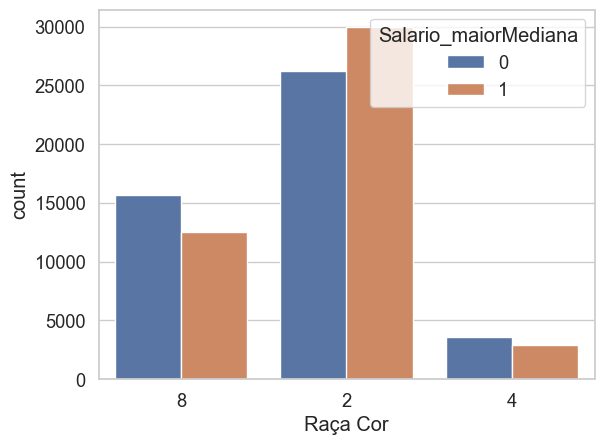

In [97]:
sns.countplot(x="Raça Cor", 
                        hue="Salario_maiorMediana",
                        data=df_sample_v2)

Vemos que o número de trabalhadores negros e pardos que recebem **abaixo** da mediana de **1663.605** é superior, proporcionalmente, que os brancos.

Percebe-se que o modelo foi mais assertivo nos grupos de pessoas negras, aqui incluindo pretos e pardos, do que pessoas que se autodeclaram brancas.

Quando separamos os dados a partir da mediana da remuneração, este sendo um valor bastante reduzido, e que incluiu, proporcionalmente, mais negros do que brancos na classe 0, de pessoas que ganham abaixo da mediana, sendo mais assertivo nestes casos.

Dentro do DashBoard também podemos ter uma visão da distribuições de previsões do modelo nos diferentes grupos de dados,  que podem ajudar a caracterizar erros de forma mais específica.

<br>
<img src="Imagens\Capturar.PNG" style="width:1200px"/>

Podemos ver que Negros tem uma maior probabilidade de serem classificados como ganhando abaixo da mediana do que pessoas brancas. (Probabilidade:0 na imagem)

### Tomada de decisão

Os recursos de tomada de decisão destinam-se a apoiar cientistas de dados no processo de melhor compreensão dos dados decisórios e na tomada de ações para obter resultados desejáveis. Basicamente como as principais variáveis podem ser alteradas de maneira a modificar a variável de interesse, indicando onde pode ser feito melhorias para mudanças. A seguir, mostramos como dados históricos e inferência causal para fornecer tal orientação. Observe que essa análise é fundamentalmente diferente da análise correlacional tradicional de dados, pois fornece orientação acionável e impede que os usuários tirem conclusões com base em relações coincidentes, mas não causais, nos dados.

In [ ]:
X = df_sample.drop('Vl Remun Média Nom', axis=1)
y = df_sample['Vl Remun Média Nom']

target_feature = 'y'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.copy()
test_data = X_test.copy()
train_data[target_feature] = y_train
test_data[target_feature] = y_test

test_data_sample = test_data.sample(n=500, random_state=42)
train_data_sample = train_data.sample(n=8000, random_state=42)

rai_insights = RAIInsights(None, train_data_sample, test_data_sample, target_feature, 'regression', categorical_features=[])

rai_insights.causal.add(treatment_features=['Tempo Emprego', 'CBO_2', 'Escolaridade após 2005', 'Idade', 'Sexo Trabalhador', 'Raça Cor'])

# Compute insights
rai_insights.compute()

# Load the dashboard
ResponsibleAIDashboard(rai_insights)

**Efeitos causais agregados**

A análise causal responde a perguntas "e se" do mundo real sobre como um resultado teria mudado sob diferentes opções de políticas. Neste exemplo específico, ele demonstra como a alteração de um tratamento específico afetaria a remuneração média dos trabalhadores do estado de São Paul0.

<br>
<img src="Imagens\analiseCausa1.PNG" style="width:1200px"/>
<img src="Imagens\chart (2).PNG" style="width:500px"/>

**Política de tratamento**
As políticas de tratamento representam as melhores intervenções futuras que podem aplicar para ver o maior impulso positivo nas remunerações dos trabalhadores de SP.

<br>
<img src="Imagens\Causal.PNG" style="width:1200px"/>

## Conclusão

Este projeto teve por objetivo demonstrar como ainda existem diferenças salariais entre pessoas que se auto declaram como negras em relação aos brancos e como o uso deste tipo de informação em modelos de aprendizado de máquina para tomada de decisões podem se tornar modelos enviezados e que podems impactar a vida das pessoas. Inicialmente, o projeto tinha como finalidade mostrar como a variável etnia pode impactar modelos de predição salarial. Removendo a variável `Raça Cor` do modelo, conseguiríamos identificar o quanto isso impactaria resultados e como é uma variável que pode enviezar modelos e impactar o processo decisório. No entanto, durante o projeto foi possível entender que apenas remover esta variável do modelo poderia não afetar os resultados devido às correlações existentes entre `Raça Cor` e outras variáveis. Então, para possibilitar a análise de como variáveis sociais impactam modelos de Machine Learning, foi utilizado um `Responsible AI Dashboard`. Este mecanismo de auditoria de modelos possibilitou entender o quanto como a variável de interesse era impactada pela etnia e trouxe ferramentas que podem acelerar o processo de obtenção de insights e de ações que impactem a vida das pessoas. À medida que a ciência de dados se torna parte integrante em processos decisórios de empresas e até em aplicativos de alto risco que envolve saúde e finanças, essas investigações garantem que as tecnologias de IA sejam desenvolvidas de maneira responsável e confiável.

## Trabalhos Futuros

A partir dos dados do Ministério do Trabalho e do Emprego disponibilizado, foi possível apenas começar uma análise

1. Fazer a mesma análise para todo o Brasil, identificando onde existe maior diferença entre as etnias
2. Fazer o mesmo estudo para outras variáveis existentes, como Sexo e município
3. Entender outras maneiras de avaliar esta diferença a partir de outras ferramentas de responsabilidade em AI existentes.